# Customer Churn Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


# The story Behind The Data
A bank is concerned that more and more customers are leaving its credit card services. They would really appreciate if someone could analyze it for them, in order to understand the main reasons for leaving the services, and to come up with recommendations for how the bank can mitigate that. Eventually, the bank would like to proactively implement these recommendations in order to keep their customers happy.

**A full ERD can be found [here](https://dbdiagram.io/d/638cdd8abae3ed7c45449eed)**

# Data Description
In this task, few datasets are provided:

1. **`BankChurners.csv`**   - this file contains basic information about each client (10 columns). The columns are:
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account;
    - `Attrition Flag` - Internal event (customer activity) variable - if the client had churned (attrited) or not (existing).
    - `Dependent Count` - Demographic variable - Number of dependents
    - `Card_Category` - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
    - `Months_on_book` - Period of relationship with bank
    - `Months_Inactive_12_mon` - No. of months inactive in the last 12 months
    - `Contacts_Count_12_mon` - No. of Contacts in the last 12 months
    - `Credit_Limit` - Credit Limit on the Credit Card
    - `Avg_Open_To_Buy` - Open to Buy Credit Line (Average of last 12 months)
    - `Avg_Utilization_Ratio` - Average Card Utilization Ratio
2. **`basic_client_info.csv`** - this file contains some basic client info per each client (6 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Customer Age` - Demographic variable - Customer's Age in Years
    - `Gender` - Demographic variable - M=Male, F=Female
    - `Education_Level` - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.`
    - `Marital_Status` - Demographic variable - Married, Single, Divorced, Unknown
    - `Income_Category` - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
3. **`enriched_churn_data.csv`** - this file contains some enriched data about each client (7 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Total_Relationship_Count` - Total no. of products held by the customer
    - `Total_Revolving_Bal` - Total Revolving Balance on the Credit Card
    - `Total_Amt_Chng_Q4_Q1` - Change in Transaction Amount (Q4 over Q1)
    - `Total_Trans_Amt` - Total Transaction Amount (Last 12 months)
    - `Total_Trans_Ct` - Total Transaction Count (Last 12 months)
    - `Total_Ct_Chng_Q4_Q1` - Change in Transaction Count (Q4 over Q1)

# SQL tasks

1. How many clients does the bank have and are above the age of 50?
2. What’s the distribution (in %) between male and female clients?
3. Let’s define a new variable called `age_group`:
    - 10 < x ≤ 30
    - 30 < x ≤ 40
    - 40 < x ≤ 50
    - 50 < x ≤ 60
    - 60 <x ≤ 120
    
    Per each `age_group`, `marital_status` and `income_category`, find out the following values:
    
    a. Churn_rate (in %)
    
    b. Average `Total_Relationship_Count`
    
    c. Minimum value of `Total_Amt_Chng_Q4_Q1`
    
    d. Count of customers
    
    Make sure to order the data by the number of customers in a descending order***
    
4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

5. Without the usage of group by at all, find the 3rd and 4th highest client IDs (`CLIENTNUM`’s) of `Total_Amt_Chng_Q4_Q1`?

6. We’re interested in knowing which client (CLIENTNUM) has the 2nd highest `Total_Trans_Amt`, Per each `Marital_Status`. 

The bank will create a dedicated campaign and target these specific clients moving forward. In this step, help the bank find these clients.

In order to start writing and running SQL queries here in Workspace, you have a SQL type cell. New cell can be added by clicking on "Add SQL". Masterschool hosts a Postgres DB with all Capstone project datasets. To connect to MS server you need to choose relevant integration. Choose according to the dataset you explore. 

SQL 1.

In [6]:
-- Start writing your SQL query here 

SELECT COUNT(DISTINCT clientnum) 
FROM basic_client_info
WHERE customer_age > 50;

count
0   3078

SQL 1) There are 3078 clients who are above the age of 50.

SQL 2.

In [10]:
select gender, 
        count(*)*100.0/(select count(*) from basic_client_info) as "distribution_in_%age"
from basic_client_info
group by 1

gender  distribution_in_%age
0      M             47.091932
1      F             52.908068

SQL 2) Males were 47.09% and females were 52.90% of the total clients.

SQL 3.

creating a view for age group below >

In [33]:
create view "age_grp" as (
select clientnum, customer_age,
        case 
            when "customer_age" <= 30 then '10-to-30'
            when "customer_age" <= 40 then '30-to-40'
            when "customer_age" <= 50 then '40-to-50'
            when "customer_age" <= 60 then '50-to-60'
            when "customer_age" <=120 then '60-to-120'
        end as age_group
from basic_client_info);

Empty DataFrame
Columns: []
Index: []

required table >

In [5]:
with each_table as (
select ag.clientnum, ag.age_group, bci.marital_status, bci.income_category, 
        case when bc.attrition_flag = 'Existing Customer' then 0
            when bc.attrition_flag = 'Attrited Customer' then 1
        end as churn_status, ecd.total_relationship_count, ecd.total_amt_chng_q4_q1 
from age_grp as ag
join basic_client_info as bci
    using(clientnum)
join bankchurners as bc
    using(clientnum)
join enriched_churn_data as ecd
    using(clientnum))
    
select age_group, marital_status, income_category, 
    sum(churn_status)*100.0/count(clientnum) as churn_rate, 
    avg(total_relationship_count) as avg_total_relationship_count, 
    min(total_amt_chng_q4_q1) as min_total_amt_chng_q4_q1, count(clientnum) as customers
from each_table
group by 1, 2, 3
order by 1, 7 desc

age_group marital_status  ... min_total_amt_chng_q4_q1  customers
0     10-to-30         Single  ...                    0.299         69
1     10-to-30        Married  ...                    0.549         36
2     10-to-30         Single  ...                    0.331         29
3     10-to-30         Single  ...                    0.391         27
4     10-to-30       Divorced  ...                    0.632         16
..         ...            ...  ...                      ...        ...
111  60-to-120        Married  ...                    0.424          2
112  60-to-120         Single  ...                    0.564          2
113  60-to-120        Unknown  ...                    0.628          2
114  60-to-120        Unknown  ...                    0.722          2
115  60-to-120       Divorced  ...                    0.567          2

[116 rows x 7 columns]

SQL 4.

In [16]:
with blue_male_cat as (
    select count(ci.*) as male_cat_cnt
    from basic_client_info as ci
    join bankchurners as bc
        on ci.clientnum = bc.clientnum
    where ci.gender = 'M' 
        and bc.card_category = 'Blue'
        and ci.income_category = '$40K - $60K'),
    blue_male_tot as (
    select count(ci.*) as blue_male_cnt
    from basic_client_info as ci
    join bankchurners as bc
        on ci.clientnum = bc.clientnum
    where ci.gender = 'M' 
        and bc.card_category = 'Blue')
SELECT (male_cat_cnt*100.0)/blue_male_cnt as "bmale_40to60_percentage"
from blue_male_cat, blue_male_tot;


bmale_40to60_percentage
0                16.493656

SQL 4) Out of all male clients, 16.49% males hold the blue card with 40K-60K income category.

SQL 5.

In [23]:
with "t_ch_3_4" as (
select clientnum, total_amt_chng_q4_q1, rank() over(order by total_amt_chng_q4_q1 desc) as rank
from enriched_churn_data)

select clientnum, total_amt_chng_q4_q1, rank
from t_ch_3_4
where rank in (3,4)

clientnum  total_amt_chng_q4_q1  rank
0  713989233                 2.675     3
1  713982108                 2.594     4

SQL 6.

In [30]:
with ms_tta_rank as (
select bci.clientnum, bci.marital_status, ecd.total_trans_amt, rank() over(partition by bci.marital_status order by total_trans_amt desc) as "ms_rank"
from basic_client_info as bci
join enriched_churn_data as ecd
    using(clientnum))
    
select marital_status, clientnum, ms_rank
from ms_tta_rank
where ms_rank = 2

marital_status  clientnum  ms_rank
0       Divorced  716894658        2
1        Married  717642633        2
2         Single  716004258        2
3        Unknown  719848008        2

## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualizations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Total number of clients
    - Churn rate %
    - Average transaction amount per customer
    - Average transaction amount before churn
    - etc.
2. **Churn rate %** among different **age groups**. You will need to:
    - Use the Bins function to split client age into age ranges
    - Define Churn rate % as a calculated field
    - Choose the way of visualizing the comparison
3. **A Scatterplot** visualizing certain customer spending behaviors and their connection to the churn if exists. For example, you can compare Total transaction amount and Total transaction count of each client and use color to mark churned and existing customers. 
4. **A Highlight Table** comparing Churn rate % among two demographic dimensions (from *basic_client_info* table), where one is placed on Rows and another on Columns, forming a matrix. 
5. **A Bar Chart** with multiple metrics by Clientnum, where each row represents one Client and has multiple metrics as columns. Add a few filters or parameters to let user drill down into the set of clients they are interested in.
6. **A Pareto Analysis** based on custom defined **customer segment**. 
    - Segment can include values from the demographic information of the client. For example,
        - Gender | Income
        - Gender | Income | Marital status
        - etc.
    - Choose the metric to analyse. For example,
        - Total number of clients (People from which customer segments most often become our clients?)
        - Churn rate absolute (How many churned customers we have in each segment?)
        - Churn rate % (What is the relative churn rate in each customer segment?)
        - etc.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the metric used in the chart(s)
    - to change the value of a benchmark
8. At least one **more visualization of your choice** adds value to your analysis.

### Tableau dashboard link - [Customer Churn Analysis Dashboard](https://public.tableau.com/views/FinalProjectMasterschool/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

![Screenshot 2023-01-26 at 11.55.59 pm](Screenshot%202023-01-26%20at%2011.55.59%20pm.png)

#### Findings from the tableau part -
- Customers aged from 40 to 60 has higher churn rate than customers aged below 40 and above 60
- Clients with graduate and higher degrees have churn rate more than 15.5% and rest of clients have lower churn rate
- Overall, Females clients are more and have higher churn rate of 17.36% than men 14.6%
- Income category didn't give any clear information about which income categories are clients churning more or less
- Married clients have less churn rate of 15.1% compared to other categories which have more than 16% churn rate
- Clients with blue card are more, but with gold and platinum cards are very less. Silver card churn rate is low compared to others
- Clients with 0 & 1 dependents have churn rate below 15, while clients with more than 1 dependents have higher churn rate

# Deep Dive Analysis / Exploratory Data Analysis

_For_ deep dive analysis and EDA follow the guidelines on project [page](https://cms.master.school/final-project-jan23)

In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading + let's see the head of each file we have
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')
bank_churners_df.head(3)

clientnum     attrition_flag  ...  avg_open_to_buy avg_utilization_ratio
0  806160108  Existing Customer  ...            676.0                 0.788
1  804424383  Existing Customer  ...           9205.0                 0.099
2  708300483  Attrited Customer  ...           7277.0                 0.077

[3 rows x 10 columns]

In [4]:
basic_client_info_df.head(3)

clientnum  customer_age  ... marital_status income_category
0  708082083            45  ...        Married  Less than $40K
1  708083283            58  ...         Single     $40K - $60K
2  708084558            46  ...       Divorced    $80K - $120K

[3 rows x 6 columns]

In [5]:
enriched_churn_df.head(3)

clientnum  total_relationship_count  ...  total_ct_chng_q4_q1  total_trans_ct
0  828343083                         3  ...                0.659              68
1  828298908                         4  ...                0.741              47
2  828294933                         3  ...                0.565              36

[3 rows x 7 columns]

In [3]:
bank_churners_df.shape

(10127, 10)

In [15]:
bank_churners_df.columns

Index(['clientnum', 'attrition_flag', 'dependent_count', 'card_category',
       'months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon',
       'credit_limit', 'avg_open_to_buy', 'avg_utilization_ratio'],
      dtype='object')

In [16]:
basic_client_info_df.shape

(10127, 6)

In [17]:
basic_client_info_df.columns

Index(['clientnum', 'customer_age', 'gender', 'education_level',
       'marital_status', 'income_category'],
      dtype='object')

In [18]:
enriched_churn_df.shape

(10127, 7)

In [19]:
enriched_churn_df.columns

Index(['clientnum', 'total_relationship_count', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1',
       'total_trans_ct'],
      dtype='object')

In [3]:
# merging all tables in one dataframe 
df = pd.merge(bank_churners_df, basic_client_info_df, how='inner', on='clientnum') \
       .merge(enriched_churn_df, how='inner', on='clientnum')
df.head()

clientnum     attrition_flag  ...  total_ct_chng_q4_q1 total_trans_ct
0  806160108  Existing Customer  ...                1.143             30
1  804424383  Existing Customer  ...                1.000             40
2  708300483  Attrited Customer  ...                0.143             16
3  808284783  Existing Customer  ...                1.095             44
4  712720158  Existing Customer  ...                1.909             32

[5 rows x 21 columns]

In [5]:
df.shape

(10127, 21)

# EDA 
## 1. Summary Statistics

### 1.1 Basic Statistics

In [5]:
df.describe()

clientnum  dependent_count  ...  total_ct_chng_q4_q1  total_trans_ct
count  1.012700e+04     10127.000000  ...         10127.000000    10127.000000
mean   7.391776e+08         2.346203  ...             0.712222       64.858695
std    3.690378e+07         1.298908  ...             0.238086       23.472570
min    7.080821e+08         0.000000  ...             0.000000       10.000000
25%    7.130368e+08         1.000000  ...             0.582000       45.000000
50%    7.179264e+08         2.000000  ...             0.702000       67.000000
75%    7.731435e+08         3.000000  ...             0.818000       81.000000
max    8.283431e+08         5.000000  ...             3.714000      139.000000

[8 rows x 15 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   card_category             10127 non-null  object 
 4   months_on_book            10127 non-null  int64  
 5   months_inactive_12_mon    10127 non-null  int64  
 6   contacts_count_12_mon     10127 non-null  int64  
 7   credit_limit              10127 non-null  float64
 8   avg_open_to_buy           10127 non-null  float64
 9   avg_utilization_ratio     10127 non-null  float64
 10  customer_age              10127 non-null  int64  
 11  gender                    10127 non-null  object 
 12  education_level           10127 non-null  object 
 13  marital_status            10127 non-null  object 
 14  income

In [9]:
df.isna().sum()

clientnum                   0
attrition_flag              0
dependent_count             0
card_category               0
months_on_book              0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
avg_open_to_buy             0
avg_utilization_ratio       0
customer_age                0
gender                      0
education_level             0
marital_status              0
income_category             0
total_relationship_count    0
total_revolving_bal         0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_ct_chng_q4_q1         0
total_trans_ct              0
dtype: int64

There are no null values in the dataset.

In [9]:
df.attrition_flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

In [10]:
df.card_category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64

In [11]:
df.gender.value_counts()

F    5358
M    4769
Name: gender, dtype: int64

In [12]:
df.education_level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

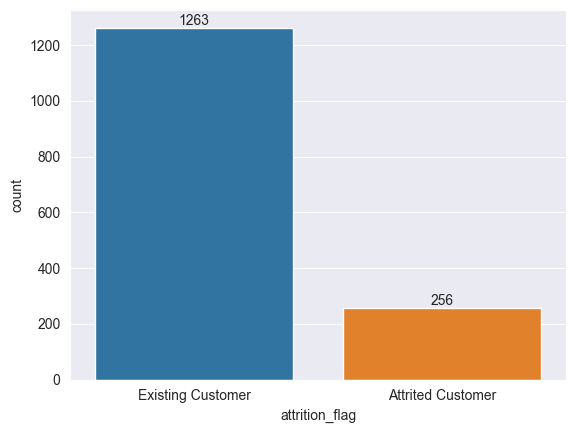

In [36]:
# unknown education level bar chart distribution
unknown_edl = df[df.education_level == "Unknown"]

ax = sns.countplot(x=unknown_edl.attrition_flag)
for i in ax.containers:
    ax.bar_label(i,);

In [13]:
df.marital_status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

In [35]:
# unknown marital status bar chart distribution
unknown_ms = df[df.marital_status == "Unknown"]

ax = sns.countplot(x=unknown_ms.attrition_flag)
for i in ax.containers:
    ax.bar_label(i,);

In [14]:
df.income_category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

In [37]:
# unknown income_category bar chart distribution
unknown_ic = df[df.income_category == "Unknown"]

ax = sns.countplot(x=unknown_ic.attrition_flag)
for i in ax.containers:
    ax.bar_label(i,);

from the above graphs, we can see that the unkown categories are still showing who is churned or not, so it doesn't makes sense to delete these records and ignore the churned records within unknown category.

### 1.2 Outliers Detection

In [6]:
df.head(2)

clientnum     attrition_flag  ...  total_ct_chng_q4_q1 total_trans_ct
0  806160108  Existing Customer  ...                1.143             30
1  804424383  Existing Customer  ...                1.000             40

[2 rows x 21 columns]

In [4]:
# setting background style for the plots
sns.set_style("darkgrid")

In [7]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9,20))
fig.suptitle("Are there any outliers?", fontsize=16, y=1.0)

g1 = sns.boxplot(data=df["dependent_count"], ax=axes[0,0])
g1.set(title="Number of Dependents", xticklabels=[], ylabel="Count")

g2 = sns.boxplot(data=df["months_on_book"], ax=axes[0,1])
g2.set(title="Period of relationship with bank", xticklabels=[], ylabel="Count of months")

g3 = sns.boxplot(data=df["months_inactive_12_mon"], ax=axes[1,0])
g3.set(title="No. of months inactive in last 12 months", xticklabels=[], ylabel="Count of months")

g4 = sns.boxplot(data=df["contacts_count_12_mon"], ax=axes[1,1])
g4.set(title="No. of contacts in the last 12 months", xticklabels=[], ylabel="Count of contacts made")

g5 = sns.boxplot(data=df["credit_limit"], ax=axes[2,0])
g5.set(title="Credit limit on card", xticklabels=[], ylabel="Limit amount")

g6 = sns.boxplot(data=df["avg_open_to_buy"], ax=axes[2,1])
g6.set(title="Last 12 months average open to buy credit line", xticklabels=[], ylabel="Average credit line")

g7 = sns.boxplot(data=df["avg_utilization_ratio"], ax=axes[3,0])
g7.set(title="Average Card Utilization ratio", xticklabels=[], ylabel="Average ratio")

g8 = sns.boxplot(data=df["customer_age"], ax=axes[3,1])
g8.set(title="Customer Age", xticklabels=[], ylabel="Age")

g9 = sns.boxplot(data=df["total_relationship_count"], ax=axes[4,0])
g9.set(title="Total no. of products held by customers", xticklabels=[], ylabel="Product Count")

g10 = sns.boxplot(data=df["total_revolving_bal"], ax=axes[4,1])
g10.set(title="Total revolving balance on credit card", xticklabels=[], ylabel="Balance amount")

g11 = sns.boxplot(data=df["total_amt_chng_q4_q1"], ax=axes[5,0])
g11.set(title="Change in transaction amount (Q4 over Q1)", xticklabels=[], ylabel="Change Amount")

g12 = sns.boxplot(data=df["total_trans_amt"], ax=axes[5,1])
g12.set(title="Total Transaction Amount", xticklabels=[], ylabel="Amount")

g13 = sns.boxplot(data=df["total_ct_chng_q4_q1"], ax=axes[6,0])
g13.set(title="Change in Transaction Count (Q4 over Q1)", xticklabels=[], ylabel="Count change")

g14 = sns.boxplot(data=df.total_ct_chng_q4_q1, ax=axes[6,1])
g14.set(title="Total CT Change Q4 Q1", xticklabels=[], ylabel="Change in Transaction Count (Q4 over Q1)")

plt.tight_layout()
plt.show()

- From the above graph, we can see that there are outliers in `[`'month_on_book'`, `'months_inactive_12_mon'`, `'contacts_count_12_mon'`, `'credit_limit'`, `'avg_open_to_buy'`, `'customer_age'`, `'total_amt_chng_q4_q1'`, `'total_trans_amt'`, `'total_ct_chng_q4_q1'`, `'total_ct_chng_q4_q1'`]` columns.
- But all the values seems to be legitimate without any errors, hence there is no need to remove them as they will add value to the analysis.

## 2. Data Cleaning

In [37]:
df[df.months_on_book < 0]

Empty DataFrame
Columns: [clientnum, attrition_flag, dependent_count, card_category, months_on_book, months_inactive_12_mon, contacts_count_12_mon, credit_limit, avg_open_to_buy, avg_utilization_ratio, customer_age, gender, education_level, marital_status, income_category, total_relationship_count, total_revolving_bal, total_amt_chng_q4_q1, total_trans_amt, total_ct_chng_q4_q1, total_trans_ct]
Index: []

In [38]:
df[df.total_amt_chng_q4_q1 < 0]

Empty DataFrame
Columns: [clientnum, attrition_flag, dependent_count, card_category, months_on_book, months_inactive_12_mon, contacts_count_12_mon, credit_limit, avg_open_to_buy, avg_utilization_ratio, customer_age, gender, education_level, marital_status, income_category, total_relationship_count, total_revolving_bal, total_amt_chng_q4_q1, total_trans_amt, total_ct_chng_q4_q1, total_trans_ct]
Index: []

In [39]:
df[df.total_ct_chng_q4_q1 < 0]

Empty DataFrame
Columns: [clientnum, attrition_flag, dependent_count, card_category, months_on_book, months_inactive_12_mon, contacts_count_12_mon, credit_limit, avg_open_to_buy, avg_utilization_ratio, customer_age, gender, education_level, marital_status, income_category, total_relationship_count, total_revolving_bal, total_amt_chng_q4_q1, total_trans_amt, total_ct_chng_q4_q1, total_trans_ct]
Index: []

In [40]:
df[df.total_trans_ct < 0]

Empty DataFrame
Columns: [clientnum, attrition_flag, dependent_count, card_category, months_on_book, months_inactive_12_mon, contacts_count_12_mon, credit_limit, avg_open_to_buy, avg_utilization_ratio, customer_age, gender, education_level, marital_status, income_category, total_relationship_count, total_revolving_bal, total_amt_chng_q4_q1, total_trans_amt, total_ct_chng_q4_q1, total_trans_ct]
Index: []

From the above finding, there seems to be no untidy or messy data and hence do data needs to be cleaned.

## 3. Distribution Analysis

In [7]:
churn_status = df.attrition_flag.value_counts()

ax = sns.barplot(x = churn_status.index, y=churn_status.values)
ax.set(title="Customer activity distribution", xlabel="Churn Status", ylabel="Count")
for i in ax.containers:   
    ax.bar_label(i,); 
# source- https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/


- It is seen that 1627 customers have attrited.

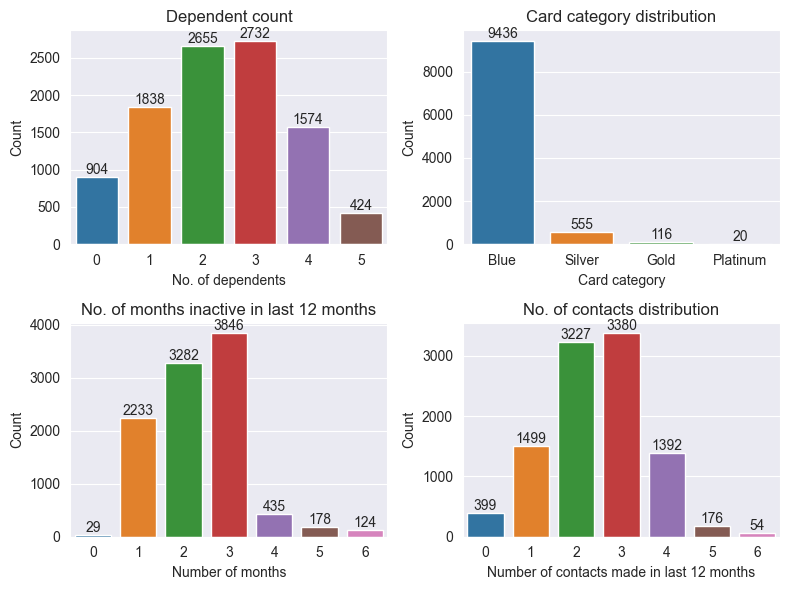

In [7]:
dep_count = df.dependent_count.value_counts().sort_index()

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8,6))

g1 = sns.barplot(x=dep_count.index, y=dep_count.values, ax=axes[0,0])
g1.set(title="Dependent count", xlabel="No. of dependents", ylabel="Count")
for i in g1.containers:   
    g1.bar_label(i,)

g2 = sns.countplot(x=df.card_category, ax=axes[0,1])
g2.set(title="Card category distribution", xlabel="Card category", ylabel="Count")
for i in g2.containers:   
    g2.bar_label(i,)
g3 = sns.countplot(x=df.months_inactive_12_mon, ax=axes[1,0])
g3.set(title="No. of months inactive in last 12 months", xlabel="Number of months", ylabel="Count")
for i in g3.containers:   
    g3.bar_label(i,)                  
g4 = sns.countplot(x=df.contacts_count_12_mon, ax=axes[1,1])
g4.set(title="No. of contacts distribution", xlabel="Number of contacts made in last 12 months", ylabel="Count")
for i in g4.containers:   
    g4.bar_label(i,)
    
plt.tight_layout()
plt.show()


- From the first graph, we can see that, majority of clients have more than 1 dependents. 2 and 3 being the most common number of dependents for clients.
- From 2nd chart, maximum number of people use Blue category card than other 3 types.
- From 3rd chart, it is seen that, most number of clients are inactive for 1 to 3 months in the last 12 months and some are for 4 to 6 months. 
- From 4th chart, it is seen that the number of contacts a client makes is in a similar pattern to the number of dependents graph.

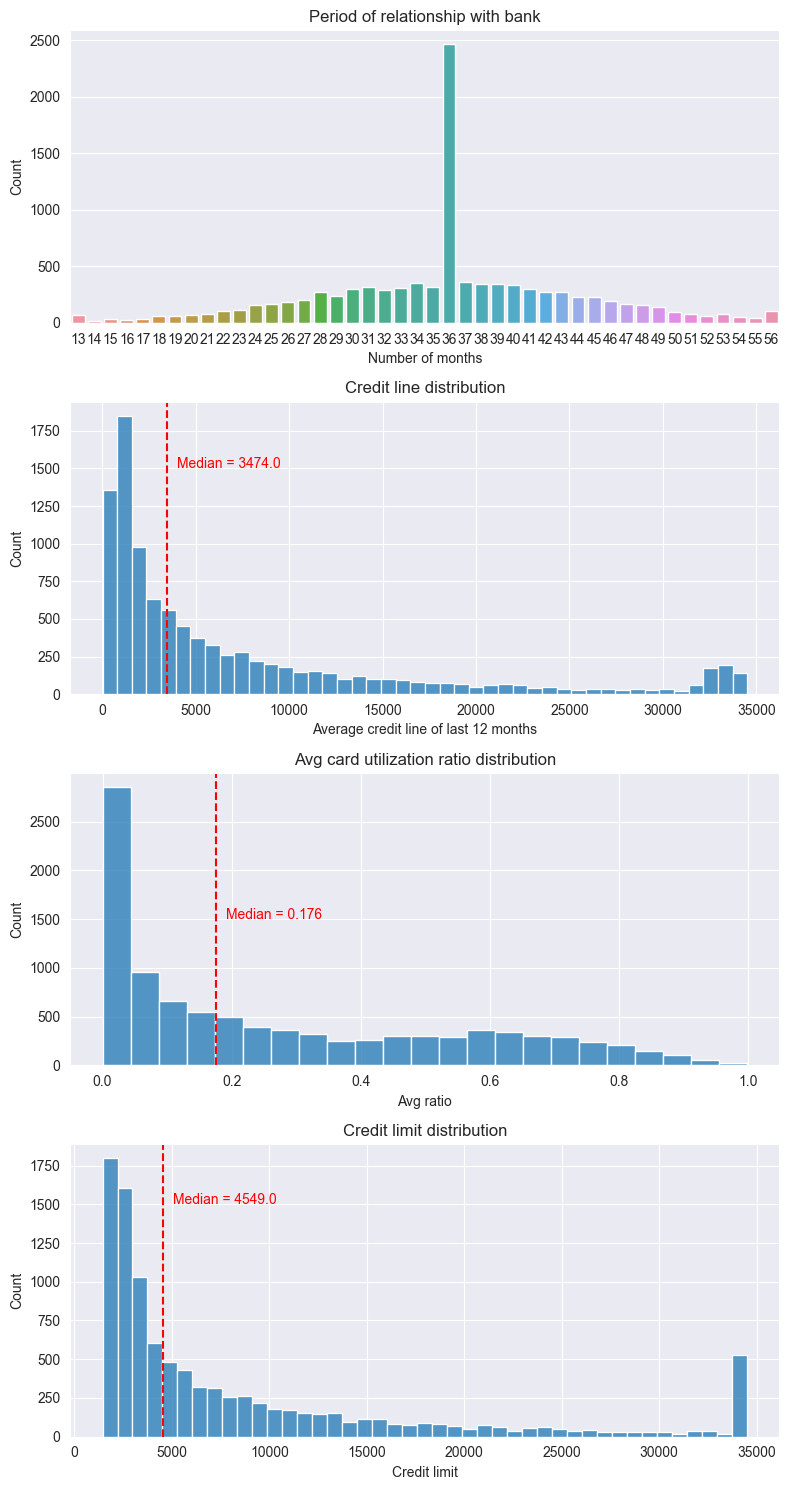

In [17]:
avg_open_to_buy_median = df.avg_open_to_buy.median()
avg_utilization_ratio_median = df.avg_utilization_ratio.median()
credit_limit_median = df.credit_limit.median()

fig, ax = plt.subplots(4, 1, figsize=(8, 15))

g1 = sns.countplot(x = df.months_on_book, ax=ax[0])
g1.set(title="Period of relationship with bank", xlabel="Number of months", ylabel="Count")

g2 = sns.histplot(x=df.avg_open_to_buy, ax=ax[1])
g2.set(title="Credit line distribution", xlabel="Average credit line of last 12 months", ylabel="Count")
g2.axvline(avg_open_to_buy_median, color="red", linestyle="--")
g2.text(x=avg_open_to_buy_median+500, y=1500, s=f"Median = {avg_open_to_buy_median}", color="red")

g3 = sns.histplot(x=df.avg_utilization_ratio, ax=ax[2])
g3.set(title="Avg card utilization ratio distribution", xlabel="Avg ratio", ylabel="Count")
g3.axvline(avg_utilization_ratio_median, color="red", linestyle="--")
g3.text(x=avg_utilization_ratio_median+0.015, y=1500, s=f"Median = {avg_utilization_ratio_median}", color="red")

g4 = sns.histplot(x=df.credit_limit, ax=ax[3])
g4.set(title="Credit limit distribution", xlabel="Credit limit", ylabel="Count")
g4.axvline(credit_limit_median, color="red", linestyle="--")
g4.text(x=credit_limit_median+500, y=1500, s=f"Median = {credit_limit_median}", color="red")

plt.tight_layout()
plt.show()

 
- Median period of relationship of clients with the bank is 36 months
- 50% of clients have average open to buy credit line below 3474
- 50% of clients have average card utilization ratio below 0.176
- Credit limit of 50% clients is less than 4549

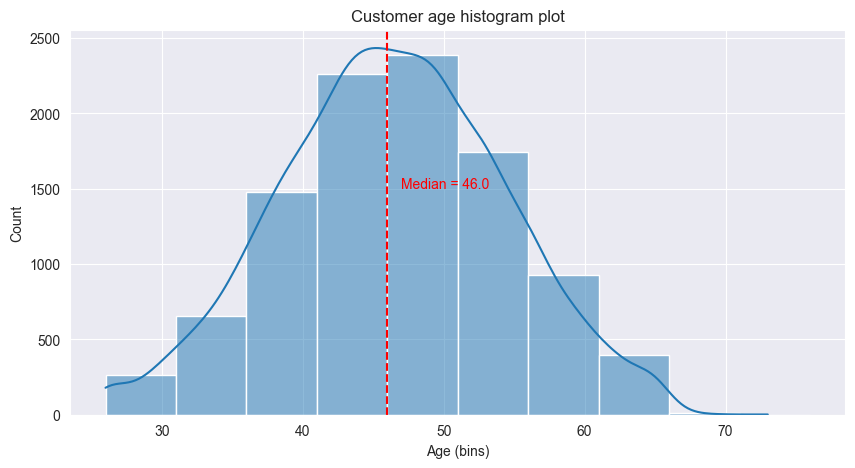

In [19]:
customer_age_median = df.customer_age.median()

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.histplot(x = df.customer_age, kde=True, binwidth=5)
ax.set(title="Customer age histogram plot", xlabel="Age (bins)", ylabel="Count")

ax.axvline(customer_age_median, color="red", linestyle="--")
ax.text(x=customer_age_median+1, y=1500, s=f"Median = {customer_age_median}", color="red")

plt.show()


- Median customer age is 46.

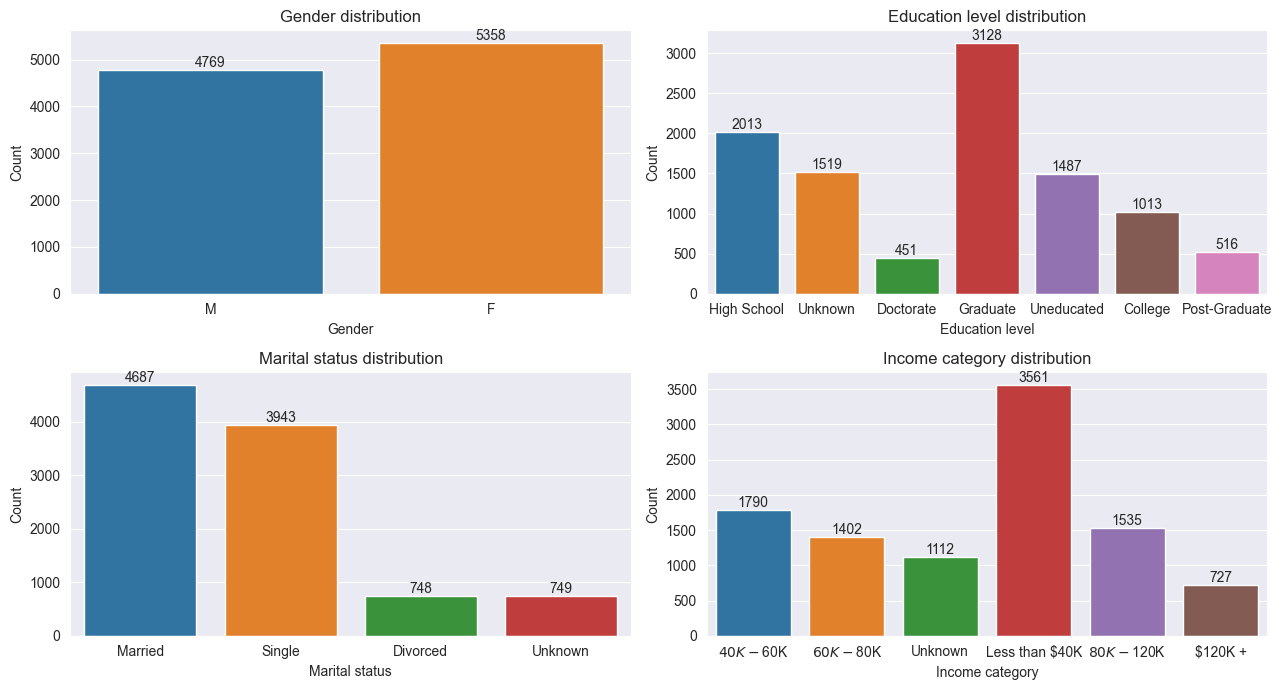

In [10]:
fig, ax = plt.subplots(2,2, figsize=(13,7))

sns.countplot(x = df.gender, ax=ax[0,0])
ax[0,0].set(title="Gender distribution", xlabel="Gender", ylabel="Count")
for i in ax[0,0].containers:
    ax[0,0].bar_label(i,)
    
sns.countplot(x = df.education_level, ax=ax[0,1])
ax[0,1].set(title="Education level distribution", xlabel="Education level", ylabel="Count")
for i in ax[0,1].containers:
    ax[0,1].bar_label(i,)

sns.countplot(x = df.marital_status, ax=ax[1,0])
ax[1,0].set(title="Marital status distribution", xlabel="Marital status", ylabel="Count")
for i in ax[1,0].containers:
    ax[1,0].bar_label(i,)

sns.countplot(x = df.income_category, ax=ax[1,1])
ax[1,1].set(title="Income category distribution", xlabel="Income category", ylabel="Count")
for i in ax[1,1].containers:
    ax[1,1].bar_label(i,)

plt.tight_layout()
plt.show()


- Overall, there are more female clients than male clients
- Most common education of clients is 'Graduate', followed by 'High School', etc
- Most clients are married, followed by single.
- Most clients have income less than 40K followed by 40K-60K

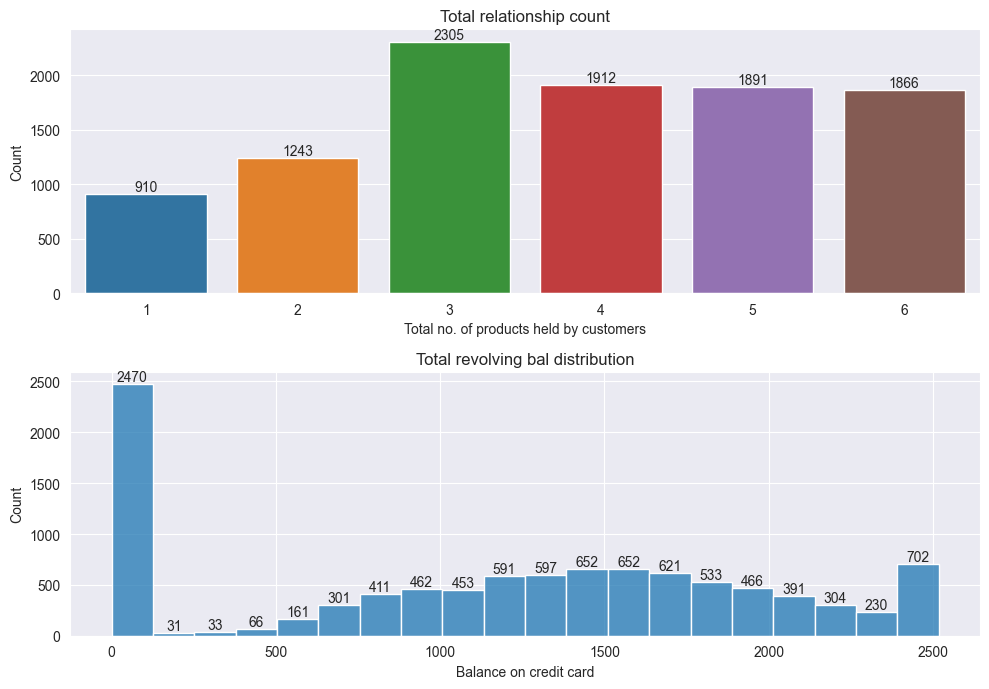

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,7))

trc = df.total_relationship_count.value_counts()
sns.barplot(x=trc.index, y=trc.values, ax=ax[0])
ax[0].set(title="Total relationship count", xlabel="Total no. of products held by customers", ylabel="Count")
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.histplot(x = df.total_revolving_bal, ax=ax[1])
ax[1].set(title="Total revolving bal distribution", xlabel="Balance on credit card", ylabel="Count")
for i in ax[1].containers:
    ax[1].bar_label(i,)

plt.tight_layout()
plt.show()


- Most of the customers hold 3 or more products

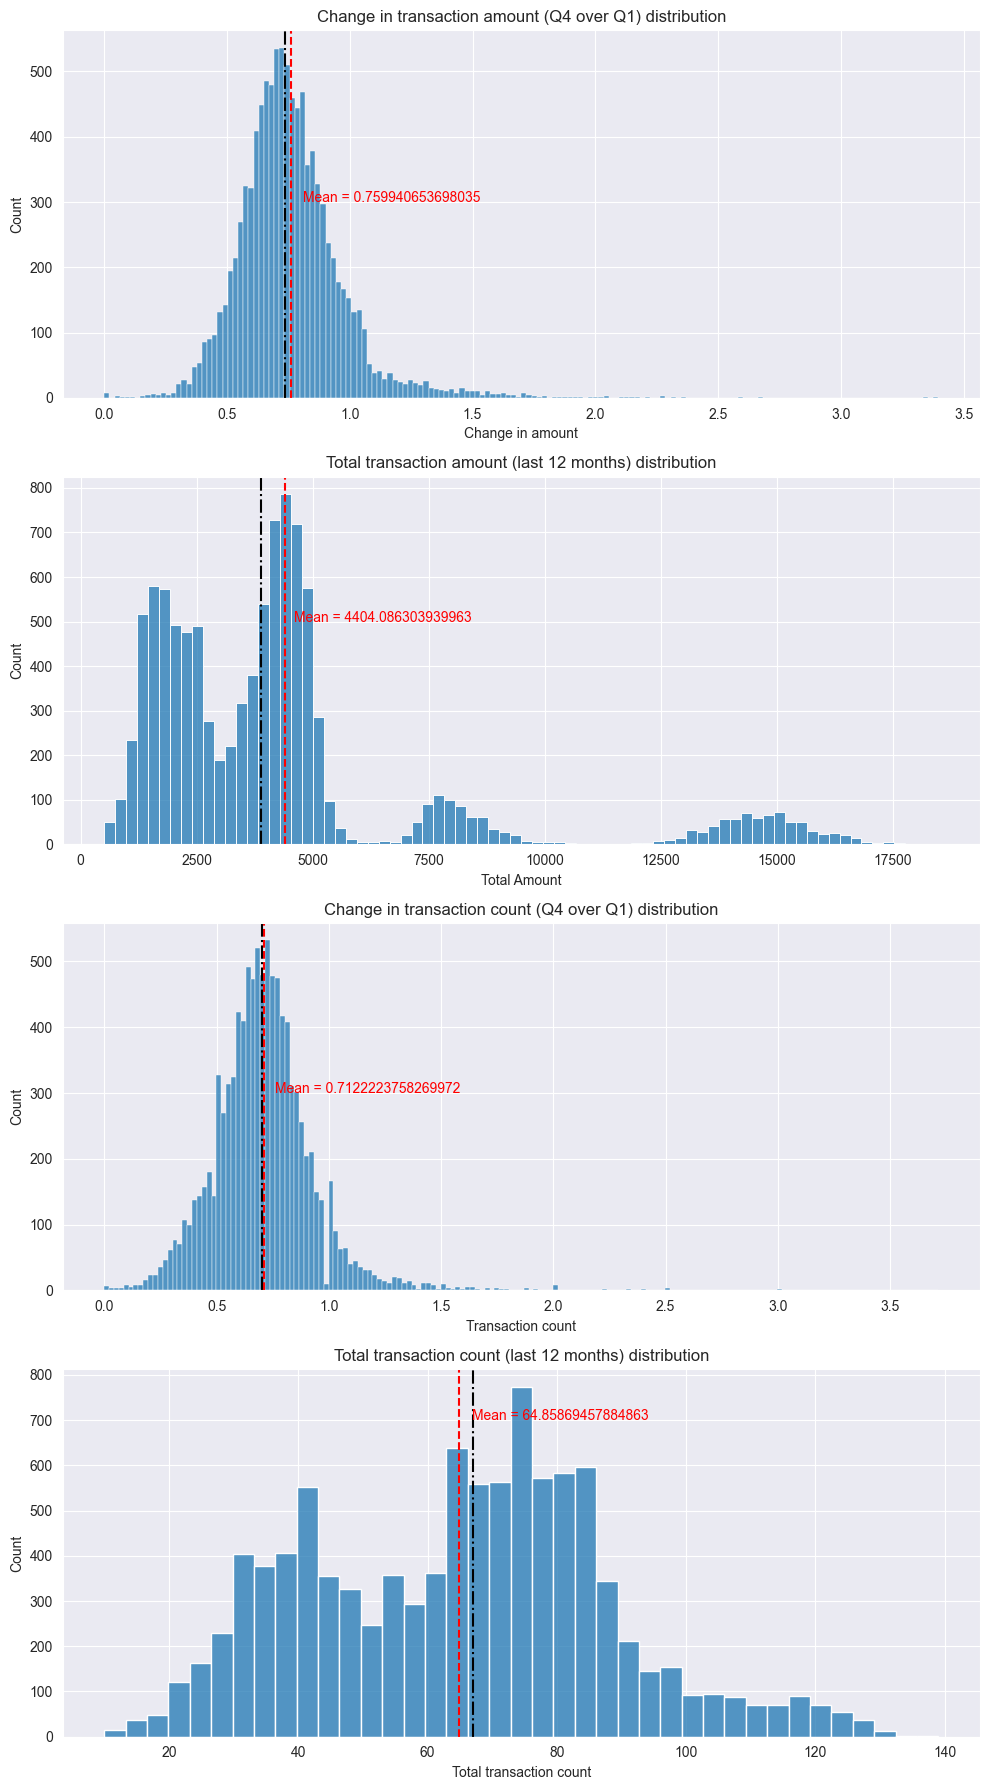

In [12]:
fig, ax = plt.subplots(4,1, figsize=(10,18))

sns.histplot(x=df.total_amt_chng_q4_q1, ax=ax[0])
ax[0].set(title="Change in transaction amount (Q4 over Q1) distribution", xlabel="Change in amount", ylabel="Count")
ta_change_mean = df.total_amt_chng_q4_q1.mean()
ta_change_median = df.total_amt_chng_q4_q1.median()
ax[0].axvline(ta_change_mean, color="red", linestyle="--")
ax[0].axvline(ta_change_median, color="black", linestyle="dashdot")
ax[0].text(x=ta_change_mean+0.05, y=300, s=f"Mean = {ta_change_mean}", color="red")

sns.histplot(x = df.total_trans_amt, ax=ax[1])
ax[1].set(title="Total transaction amount (last 12 months) distribution", xlabel="Total Amount", ylabel="Count")
ta_total_mean = df.total_trans_amt.mean()
ta_total_median = df.total_trans_amt.median()
ax[1].axvline(ta_total_mean, color="red", linestyle="--")
ax[1].axvline(ta_total_median, color="black", linestyle="dashdot")
ax[1].text(x=ta_total_mean+200, y=500, s=f"Mean = {ta_total_mean}", color="red")

sns.histplot(x = df.total_ct_chng_q4_q1, ax=ax[2])
ax[2].set(title="Change in transaction count (Q4 over Q1) distribution", xlabel="Transaction count", ylabel="Count")
tc_change_mean = df.total_ct_chng_q4_q1.mean()
tc_change_median = df.total_ct_chng_q4_q1.median()
ax[2].axvline(tc_change_mean, color="red", linestyle="--")
ax[2].axvline(tc_change_median, color="black", linestyle="dashdot")
ax[2].text(x=tc_change_mean+0.05, y=300, s=f"Mean = {tc_change_mean}", color="red")

sns.histplot(x = df.total_trans_ct, ax=ax[3])
ax[3].set(title="Total transaction count (last 12 months) distribution", xlabel="Total transaction count", ylabel="Count")
tc_total_mean = df.total_trans_ct.mean()
tc_total_median = df.total_trans_ct.median()
ax[3].axvline(tc_total_mean, color="red", linestyle="--")
ax[3].axvline(tc_total_median, color="black", linestyle="dashdot")
ax[3].text(x=tc_total_mean+2, y=700, s=f"Mean = {tc_total_mean}", color="red")

plt.tight_layout()
plt.show()

 
- For change in transaction amount, majority of values fall below the average
- Majority of values of total transaction amount fall below the average
- For change in transaction count, median and mean are almost same
- Majority of values for total transaction count fall after the average value

In [8]:
df.head()

clientnum     attrition_flag  ...  total_ct_chng_q4_q1 total_trans_ct
0  806160108  Existing Customer  ...                1.143             30
1  804424383  Existing Customer  ...                1.000             40
2  708300483  Attrited Customer  ...                0.143             16
3  808284783  Existing Customer  ...                1.095             44
4  712720158  Existing Customer  ...                1.909             32

[5 rows x 21 columns]

## 4. Cross-Correlation Analysis

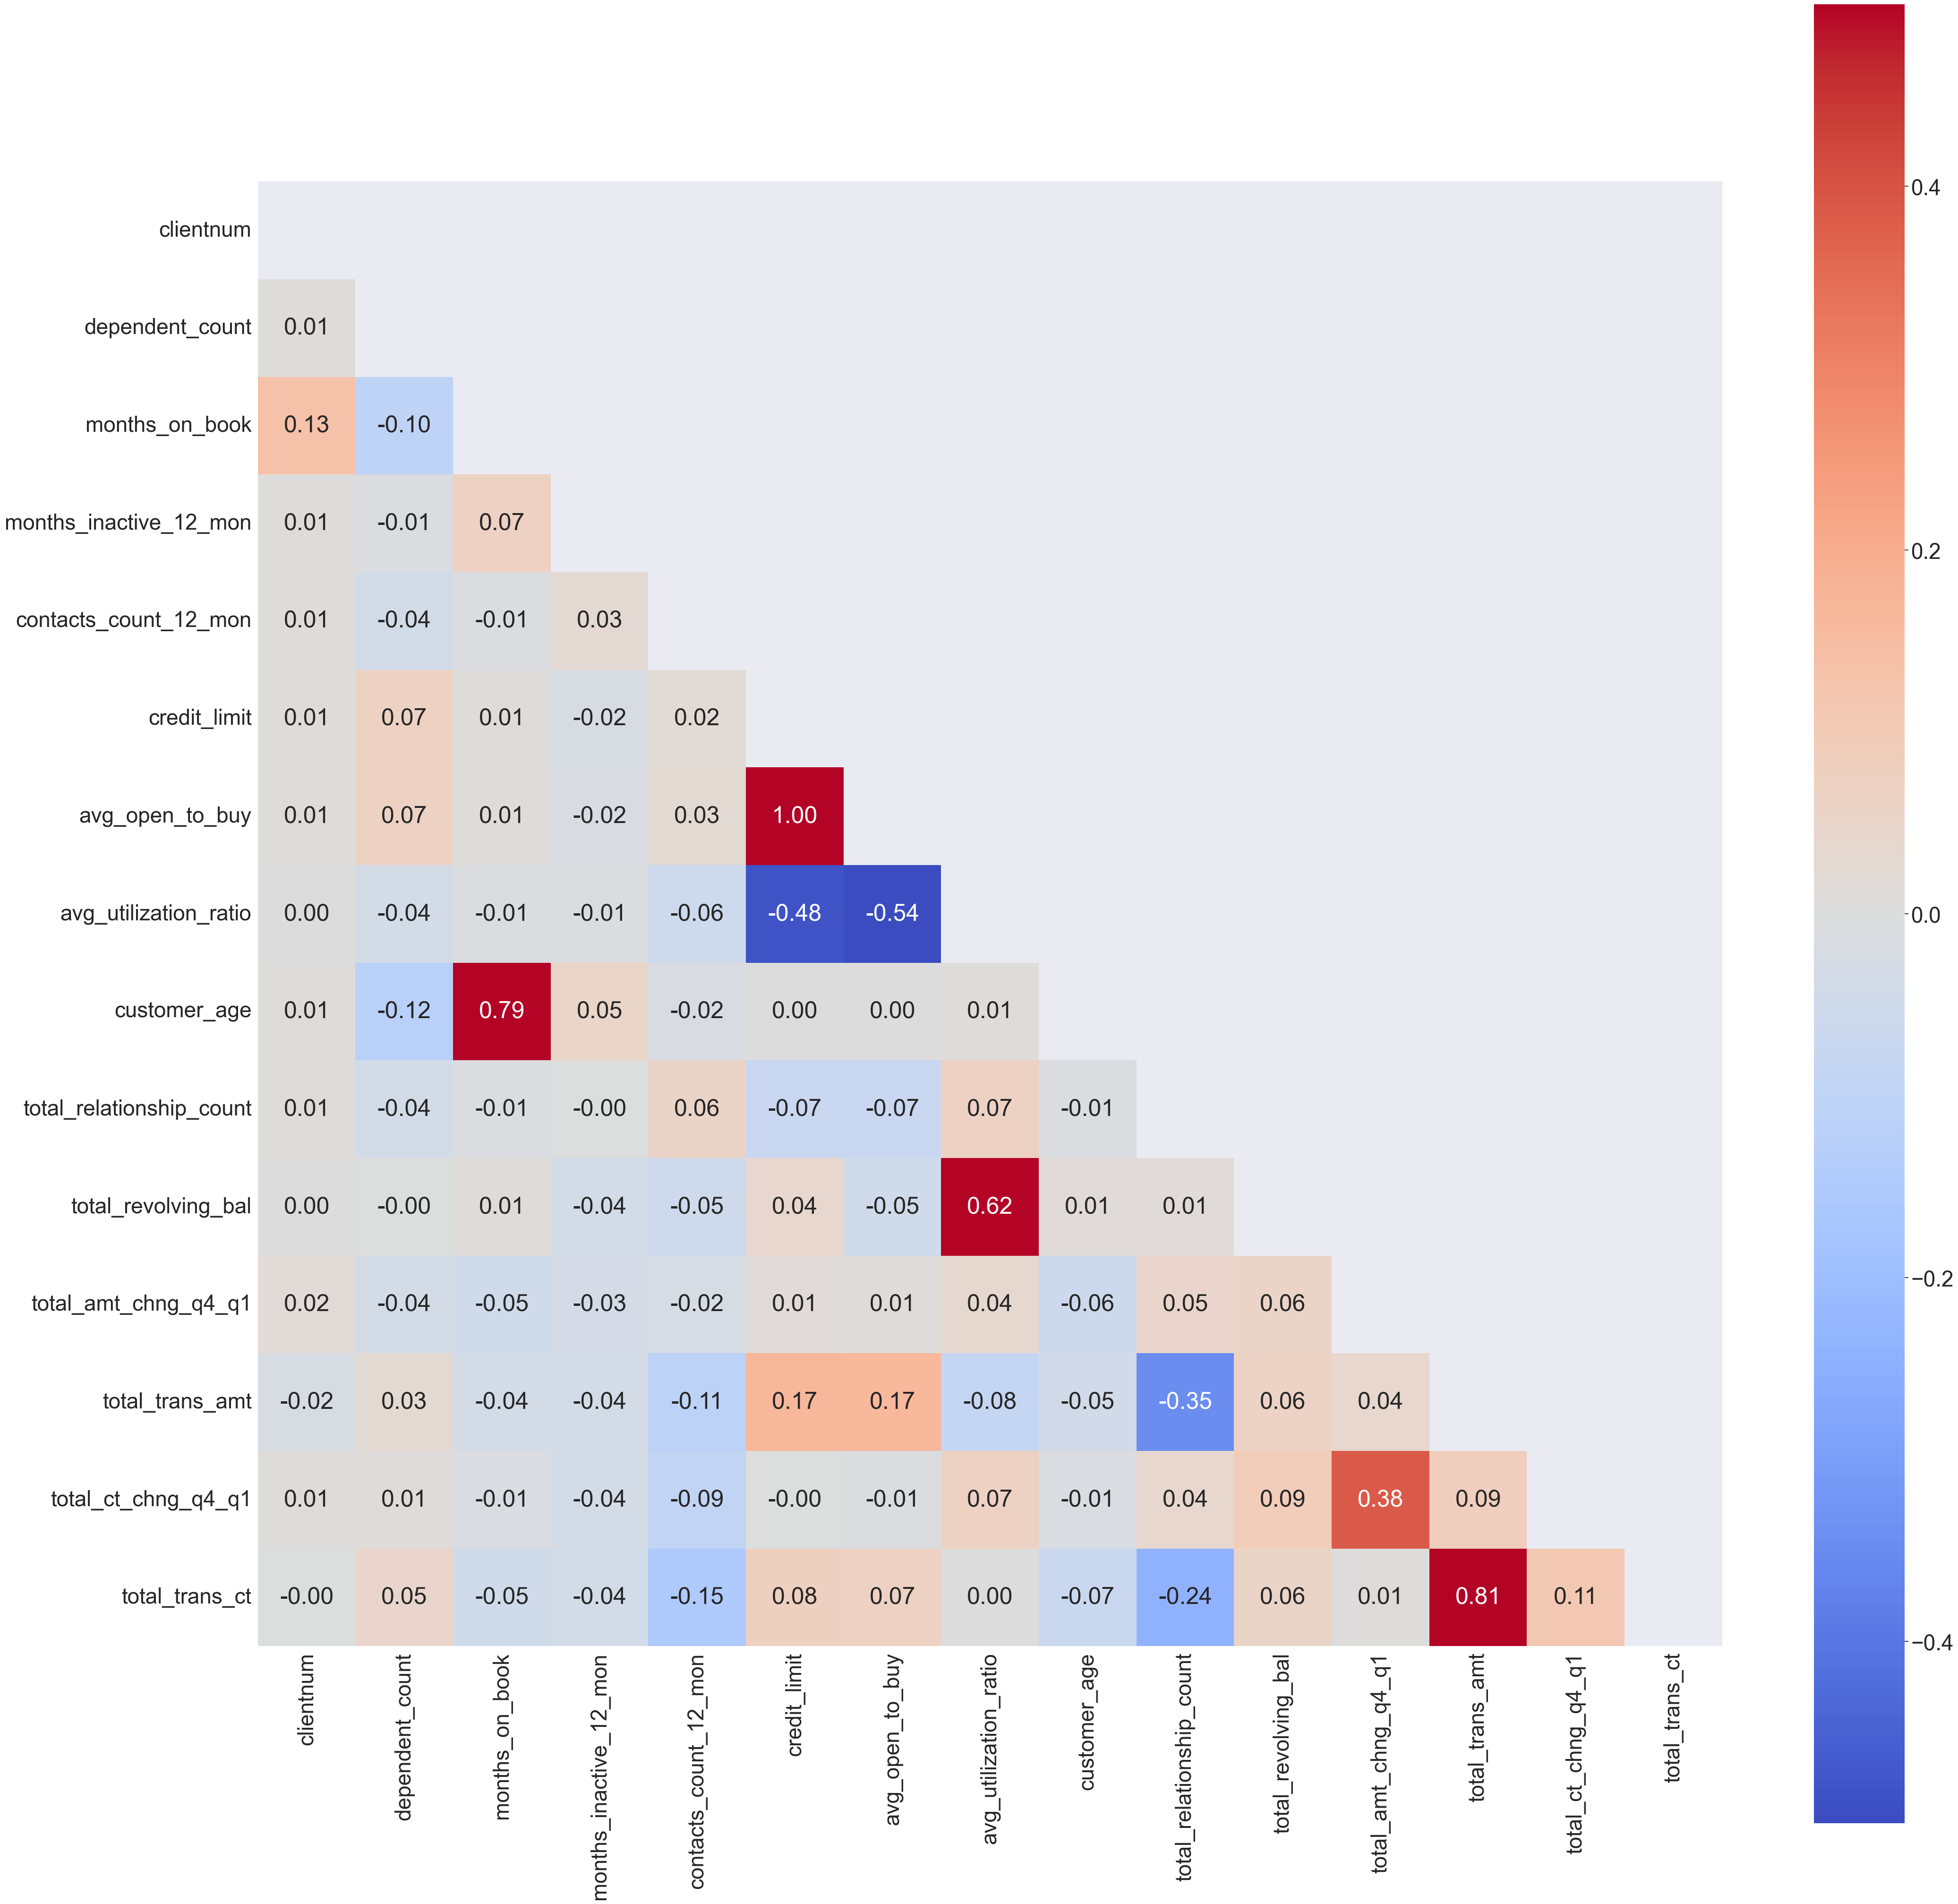

In [6]:
sns.set(font_scale=3.0)
plt.figure(figsize=(50, 50))
top_mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(),vmin=-.5, vmax=.5, annot=True, mask=top_mask, cmap='coolwarm', fmt='.2f', square=True)

What is the cross-correlation between columns?
- Credit limit seems to be directly proportional to avg open to buy credit line of the last 12 months
- Customer age strongly correlates with months_on_book (period of relationship with the bank)

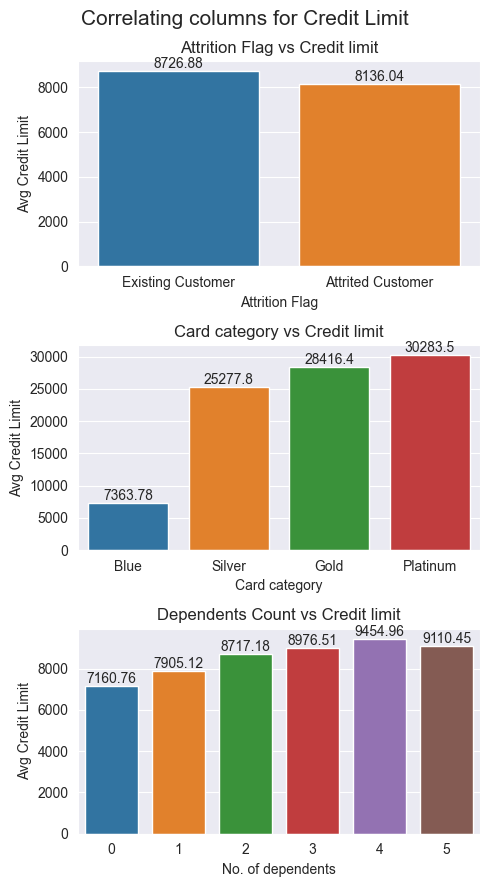

In [20]:
fig, ax = plt.subplots(3,1, figsize=(5,9))

fig.suptitle("Correlating columns for Credit Limit", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.credit_limit, ax=ax[0], ci=None)
ax[0].set(title="Attrition Flag vs Credit limit", xlabel="Attrition Flag", ylabel="Avg Credit Limit")
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.barplot(x=df.card_category, y=df.credit_limit, ax=ax[1], ci=None)
ax[1].set(title="Card category vs Credit limit", xlabel="Card category", ylabel="Avg Credit Limit")
for i in ax[1].containers:
    ax[1].bar_label(i,)

sns.barplot(x=df.dependent_count, y=df.credit_limit, ax=ax[2], ci=None)
ax[2].set(title="Dependents Count vs Credit limit", xlabel="No. of dependents", ylabel="Avg Credit Limit")
for i in ax[2].containers:
    ax[2].bar_label(i,)

plt.tight_layout()
plt.show()


- There is not a major difference between the credit limit of existing and attrited customers.
- Credit limit of platinum card clients is the highest, followed by gold, silver and blue, respectively.
- It seems that credit limit for clients with 1 or more dependents is greater than those with 0 dependents.

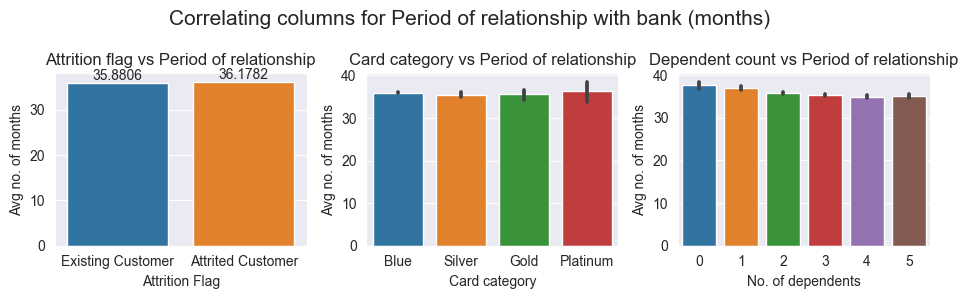

In [22]:
fig, ax = plt.subplots(1,3, figsize=(9.5,3))

fig.suptitle("Correlating columns for Period of relationship with bank (months)", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.months_on_book, ax=ax[0], ci=None)
ax[0].set(title="Attrition flag vs Period of relationship", xlabel="Attrition Flag", ylabel="Avg no. of months")
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.barplot(x=df.card_category, y=df.months_on_book, ax=ax[1])
ax[1].set(title="Card category vs Period of relationship", xlabel="Card category", ylabel="Avg no. of months")

sns.barplot(x=df.dependent_count, y=df.months_on_book, ax=ax[2])
ax[2].set(title="Dependent count vs Period of relationship", xlabel="No. of dependents", ylabel="Avg no. of months")

plt.tight_layout()
plt.show()


- There is no major significance to the above plots as all the values seems to be close to each other.

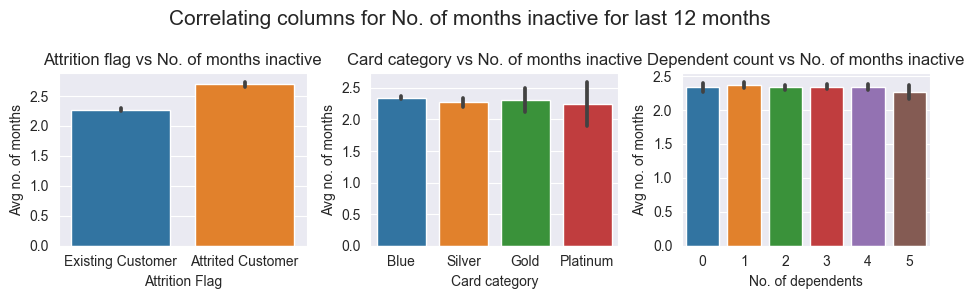

In [40]:
fig, ax = plt.subplots(1,3, figsize=(9.5,3))

fig.suptitle("Correlating columns for No. of months inactive for last 12 months", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.months_inactive_12_mon, ax=ax[0])
ax[0].set(title="Attrition flag vs No. of months inactive", xlabel="Attrition Flag", ylabel="Avg no. of months")

sns.barplot(x=df.card_category, y=df.months_inactive_12_mon, ax=ax[1])
ax[1].set(title="Card category vs No. of months inactive", xlabel="Card category", ylabel="Avg no. of months")

sns.barplot(x=df.dependent_count, y=df.months_inactive_12_mon, ax=ax[2])
ax[2].set(title="Dependent count vs No. of months inactive", xlabel="No. of dependents", ylabel="Avg no. of months")

plt.tight_layout()
plt.show()


- From the above, we can see that attritted customers are inactive for more months on average compared to existing ones.

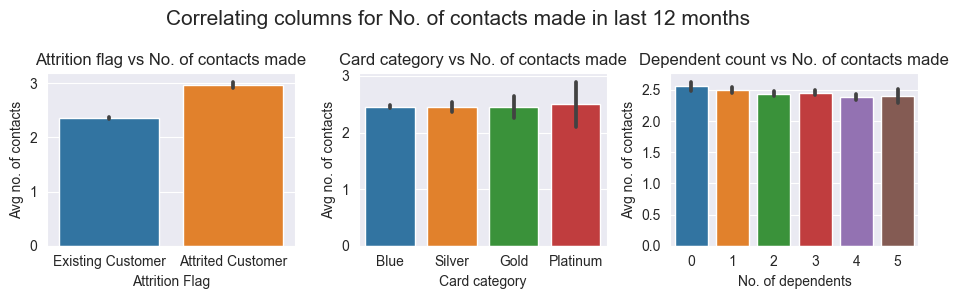

In [39]:
fig, ax = plt.subplots(1,3, figsize=(9.5,3))

fig.suptitle("Correlating columns for No. of contacts made in last 12 months", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.contacts_count_12_mon, ax=ax[0])
ax[0].set(title="Attrition flag vs No. of contacts made", xlabel="Attrition Flag", ylabel="Avg no. of contacts")

sns.barplot(x=df.card_category, y=df.contacts_count_12_mon, ax=ax[1])
ax[1].set(title="Card category vs No. of contacts made", xlabel="Card category", ylabel="Avg no. of contacts")

sns.barplot(x=df.dependent_count, y=df.contacts_count_12_mon, ax=ax[2])
ax[2].set(title="Dependent count vs No. of contacts made", xlabel="No. of dependents", ylabel="Avg no. of contacts")

plt.tight_layout()
plt.show()


- Attritted customers have made more number of contacts in the last 12 months.

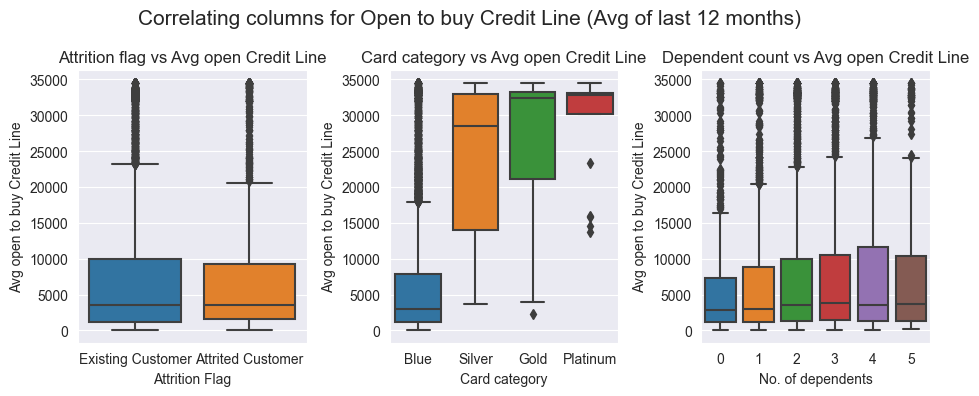

In [38]:
fig, ax = plt.subplots(1,3, figsize=(9.5,4))

fig.suptitle("Correlating columns for Open to buy Credit Line (Avg of last 12 months)", fontsize=15)

sns.boxplot(x=df.attrition_flag, y=df.avg_open_to_buy, ax=ax[0])
ax[0].set(title="Attrition flag vs Avg open Credit Line", xlabel="Attrition Flag", ylabel="Avg open to buy Credit Line")

sns.boxplot(x=df.card_category, y=df.avg_open_to_buy, ax=ax[1])
ax[1].set(title="Card category vs Avg open Credit Line", xlabel="Card category", ylabel="Avg open to buy Credit Line")

sns.boxplot(x=df.dependent_count, y=df.avg_open_to_buy, ax=ax[2])
ax[2].set(title="Dependent count vs Avg open Credit Line", xlabel="No. of dependents", ylabel="Avg open to buy Credit Line")

plt.tight_layout()
plt.show()

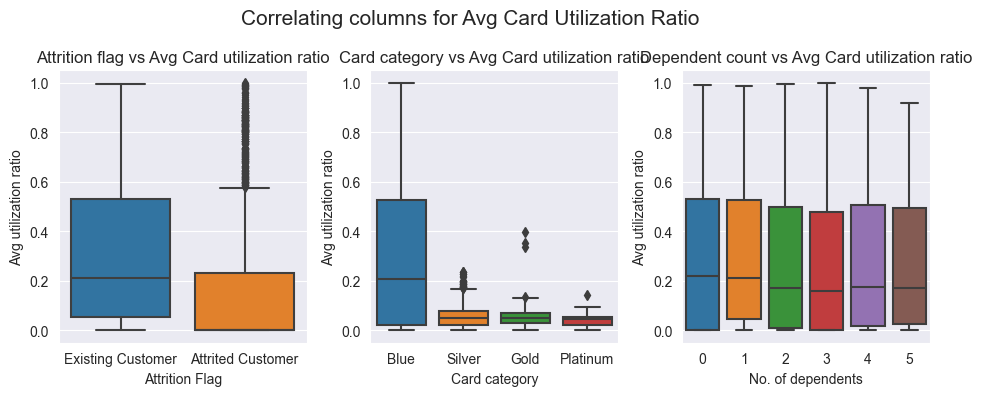

In [42]:
fig, ax = plt.subplots(1,3, figsize=(9.5,4))

fig.suptitle("Correlating columns for Avg Card Utilization Ratio", fontsize=15)

sns.boxplot(x=df.attrition_flag, y=df.avg_utilization_ratio, ax=ax[0])
ax[0].set(title="Attrition flag vs Avg Card utilization ratio", xlabel="Attrition Flag", ylabel="Avg utilization ratio")

sns.boxplot(x=df.card_category, y=df.avg_utilization_ratio, ax=ax[1])
ax[1].set(title="Card category vs Avg Card utilization ratio", xlabel="Card category", ylabel="Avg utilization ratio")

sns.boxplot(x=df.dependent_count, y=df.avg_utilization_ratio, ax=ax[2])
ax[2].set(title="Dependent count vs Avg Card utilization ratio", xlabel="No. of dependents", ylabel="Avg utilization ratio")

plt.tight_layout()
plt.show()

 
- Existing customers have better average card utilization ratio as compared to attrited ones.
- Blue card category customers have better average card utilization ratio than other 3 cards.

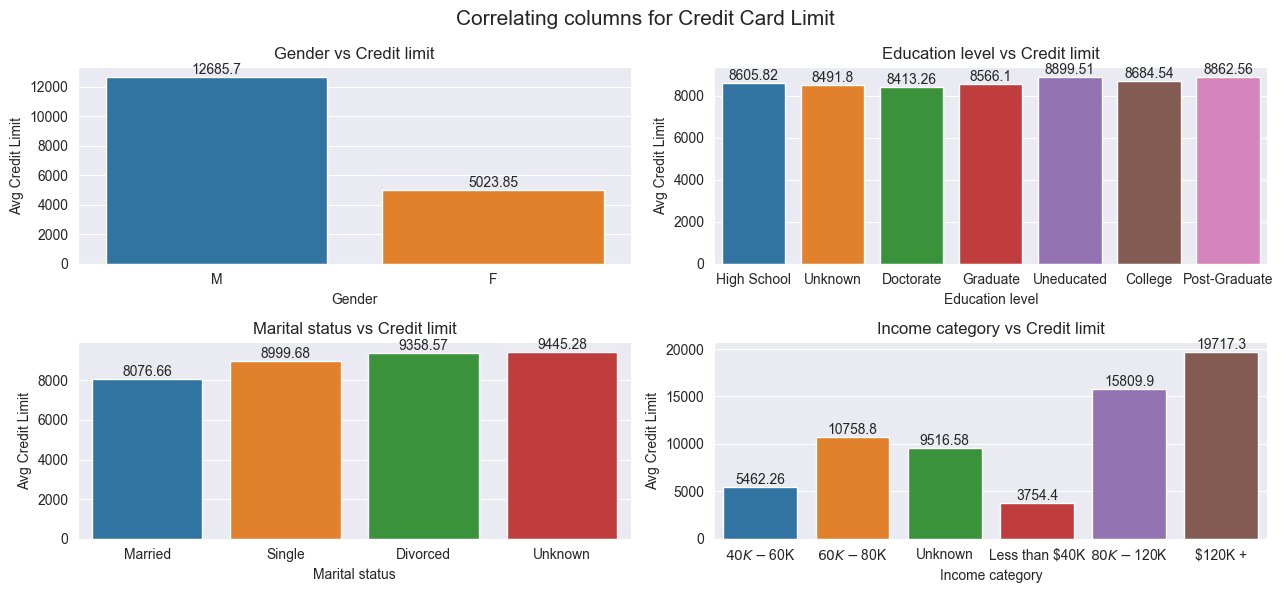

In [42]:
fig, ax = plt.subplots(2,2, figsize=(13,6))

fig.suptitle("Correlating columns for Credit Card Limit", fontsize=15)

sns.barplot(x=df.gender, y=df.credit_limit, ax=ax[0,0], ci=None)
ax[0,0].set(title="Gender vs Credit limit", xlabel="Gender", ylabel="Avg Credit Limit")
for i in ax[0,0].containers:
    ax[0,0].bar_label(i)

sns.barplot(x=df.education_level, y=df.credit_limit, ax=ax[0,1], ci=None)
ax[0,1].set(title="Education level vs Credit limit", xlabel="Education level", ylabel="Avg Credit Limit")
for i in ax[0,1].containers:
    ax[0,1].bar_label(i)

sns.barplot(x=df.marital_status, y=df.credit_limit, ax=ax[1,0], ci=None)
ax[1,0].set(title="Marital status vs Credit limit", xlabel="Marital status", ylabel="Avg Credit Limit")
for i in ax[1,0].containers:
    ax[1,0].bar_label(i)

sns.barplot(x=df.income_category, y=df.credit_limit, ax=ax[1,1], ci=None)
ax[1,1].set(title="Income category vs Credit limit", xlabel="Income category", ylabel="Avg Credit Limit")
for i in ax[1,1].containers:
    ax[1,1].bar_label(i)

plt.tight_layout()
plt.show()


- Males have more than double credit limit on average as compared to female clients
- Credit limit of married clients is less than other categories
- Credit limit is directly promotional to the amount of income hence it increases as the income category increase

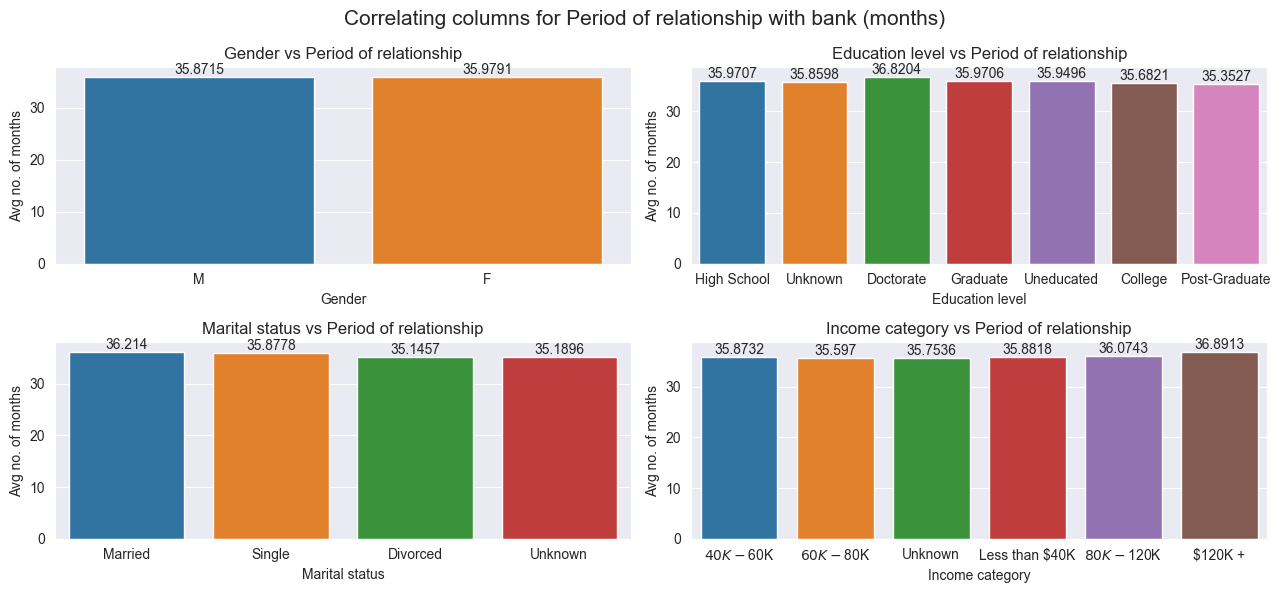

In [43]:
fig, ax = plt.subplots(2,2, figsize=(13,6))

fig.suptitle("Correlating columns for Period of relationship with bank (months)", fontsize=15)

sns.barplot(x=df.gender, y=df.months_on_book, ax=ax[0,0], ci=None)
ax[0,0].set(title="Gender vs Period of relationship", xlabel="Gender", ylabel="Avg no. of months")
for i in ax[0,0].containers:
    ax[0,0].bar_label(i)

sns.barplot(x=df.education_level, y=df.months_on_book, ax=ax[0,1], ci=None)
ax[0,1].set(title="Education level vs Period of relationship", xlabel="Education level", ylabel="Avg no. of months")
for i in ax[0,1].containers:
    ax[0,1].bar_label(i)

sns.barplot(x=df.marital_status, y=df.months_on_book, ax=ax[1,0], ci=None)
ax[1,0].set(title="Marital status vs Period of relationship", xlabel="Marital status", ylabel="Avg no. of months")
for i in ax[1,0].containers:
    ax[1,0].bar_label(i)

sns.barplot(x=df.income_category, y=df.months_on_book, ax=ax[1,1], ci=None)
ax[1,1].set(title="Income category vs Period of relationship", xlabel="Income category", ylabel="Avg no. of months")
for i in ax[1,1].containers:
    ax[1,1].bar_label(i)

plt.tight_layout()
plt.show()


- Each categories seems to have almost same values for avg no. of months of relationship.

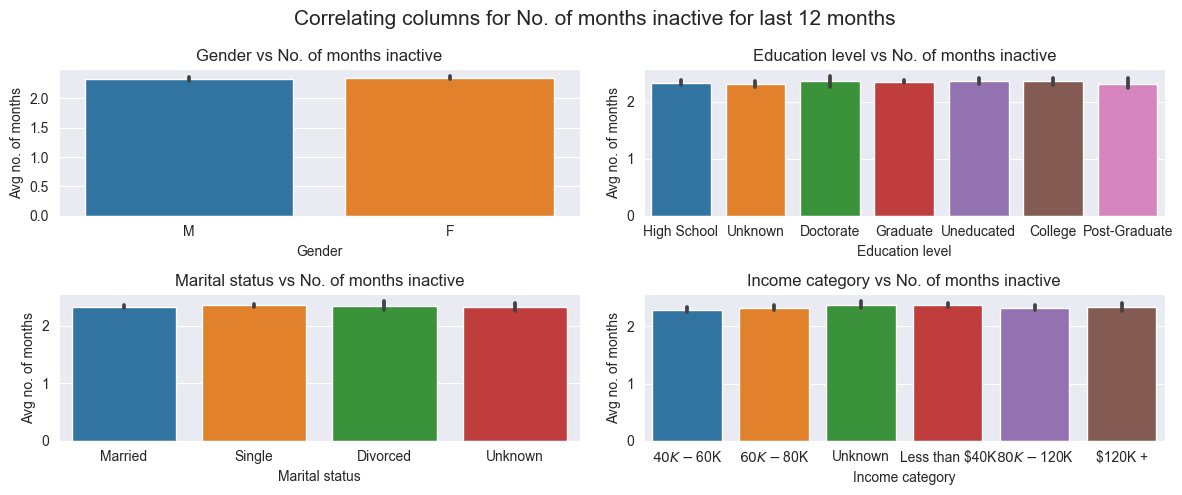

In [19]:
fig, ax = plt.subplots(2,2, figsize=(12,5))

fig.suptitle("Correlating columns for No. of months inactive for last 12 months", fontsize=15)

sns.barplot(x=df.gender, y=df.months_inactive_12_mon, ax=ax[0,0])
ax[0,0].set(title="Gender vs No. of months inactive", xlabel="Gender", ylabel="Avg no. of months")

sns.barplot(x=df.education_level, y=df.months_inactive_12_mon, ax=ax[0,1])
ax[0,1].set(title="Education level vs No. of months inactive", xlabel="Education level", ylabel="Avg no. of months")

sns.barplot(x=df.marital_status, y=df.months_inactive_12_mon, ax=ax[1,0])
ax[1,0].set(title="Marital status vs No. of months inactive", xlabel="Marital status", ylabel="Avg no. of months")

sns.barplot(x=df.income_category, y=df.months_inactive_12_mon, ax=ax[1,1])
ax[1,1].set(title="Income category vs No. of months inactive", xlabel="Income category", ylabel="Avg no. of months")

plt.tight_layout()
plt.show()

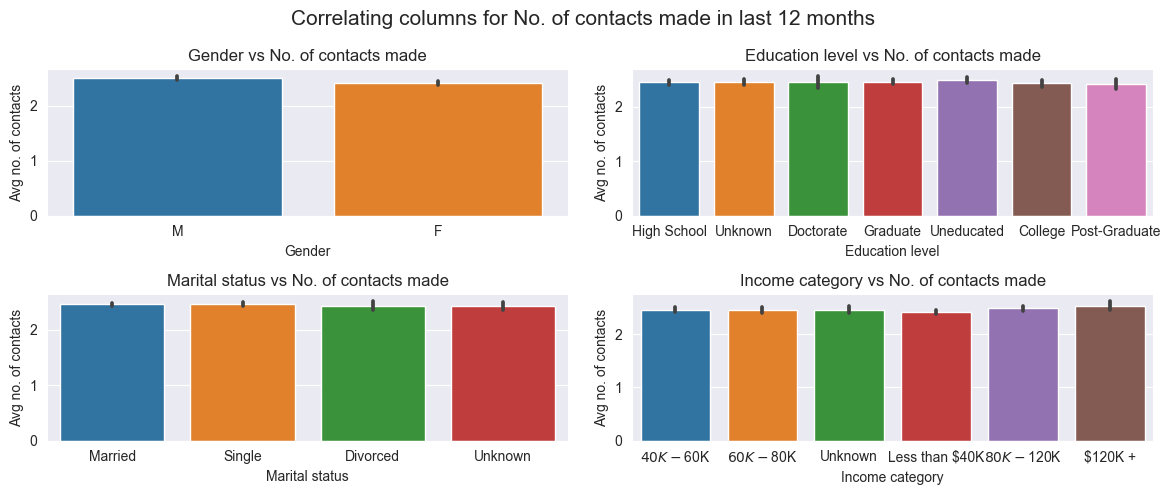

In [18]:
fig, ax = plt.subplots(2,2, figsize=(12,5))

fig.suptitle("Correlating columns for No. of contacts made in last 12 months", fontsize=15)

sns.barplot(x=df.gender, y=df.contacts_count_12_mon, ax=ax[0,0])
ax[0,0].set(title="Gender vs No. of contacts made", xlabel="Gender", ylabel="Avg no. of contacts")

sns.barplot(x=df.education_level, y=df.contacts_count_12_mon, ax=ax[0,1])
ax[0,1].set(title="Education level vs No. of contacts made", xlabel="Education level", ylabel="Avg no. of contacts")

sns.barplot(x=df.marital_status, y=df.contacts_count_12_mon, ax=ax[1,0])
ax[1,0].set(title="Marital status vs No. of contacts made", xlabel="Marital status", ylabel="Avg no. of contacts")

sns.barplot(x=df.income_category, y=df.contacts_count_12_mon, ax=ax[1,1])
ax[1,1].set(title="Income category vs No. of contacts made", xlabel="Income category", ylabel="Avg no. of contacts")

plt.tight_layout()
plt.show()

In [16]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

fig.suptitle("Correlating columns for Open to buy Credit Line (Avg of last 12 months)", fontsize=15)

sns.boxplot(x=df.gender, y=df.avg_open_to_buy, ax=ax[0,0])
ax[0,0].set(title="Gender vs Avg open Credit Line", xlabel="Gender", ylabel="Avg open to buy Credit Line")

sns.boxplot(x=df.education_level, y=df.avg_open_to_buy, ax=ax[0,1])
ax[0,1].set(title="Education level vs Avg open Credit Line", xlabel="Education level", ylabel="Avg open to buy Credit Line")

sns.boxplot(x=df.marital_status, y=df.avg_open_to_buy, ax=ax[1,0])
ax[1,0].set(title="Marital status vs Avg open Credit Line", xlabel="Marital status", ylabel="Avg open to buy Credit Line")

sns.boxplot(x=df.income_category, y=df.avg_open_to_buy, ax=ax[1,1])
ax[1,1].set(title="Income category vs Avg open Credit Line", xlabel="Income category", ylabel="Avg open to buy Credit Line")

plt.tight_layout()
plt.show()


- On average, males have higher open to buy credit line in the last 12 months than females.
- Avg open to buy follows the same pattern as that of avg credit line charts

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

fig.suptitle("Correlating columns for Avg Card Utilization Ratio", fontsize=15)

sns.boxplot(x=df.gender, y=df.avg_utilization_ratio, ax=ax[0,0])
ax[0,0].set(title="Gender vs Avg open Credit Line", xlabel="Gender", ylabel="Avg utilization ratio")

sns.boxplot(x=df.education_level, y=df.avg_utilization_ratio, ax=ax[0,1])
ax[0,1].set(title="Education level vs Avg open Credit Line", xlabel="Education level", ylabel="Avg utilization ratio")

sns.boxplot(x=df.marital_status, y=df.avg_utilization_ratio, ax=ax[1,0])
ax[1,0].set(title="Marital status vs Avg open Credit Line", xlabel="Marital status", ylabel="Avg utilization ratio")

sns.boxplot(x=df.income_category, y=df.avg_utilization_ratio, ax=ax[1,1])
ax[1,1].set(title="Income category vs Avg open Credit Line", xlabel="Income category", ylabel="Avg utilization ratio")

plt.tight_layout()
plt.show()


- On average females have higher card utilization ratio
- Avg card utilization ratio for high income clients (60K-80K, 80K-120K, & 120K+) is low as compared to low income categories (less than 40K, 40K-60K)

In [45]:
fig, ax = plt.subplots(1,3, figsize=(9.5,4))

fig.suptitle("Correlating columns for Total number of products held by customer", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.total_relationship_count, ax=ax[0], ci=None)
ax[0].set(title="Attrition flag vs Avg no. of products", xlabel="Attrition Flag", ylabel="Avg no. of products")
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.barplot(x=df.card_category, y=df.total_relationship_count, ax=ax[1], ci=None)
ax[1].set(title="Card category vs Avg no. of products", xlabel="Card category", ylabel="Avg no. of products")
for i in ax[1].containers:
    ax[1].bar_label(i)

sns.barplot(x=df.dependent_count, y=df.total_relationship_count, ax=ax[2], ci=None)
ax[2].set(title="Dependent count vs Avg no. of products", xlabel="No. of dependents", ylabel="Avg no. of products")

plt.tight_layout()
plt.show()


- On average attrited customers hold lesser number of products than existing customers
- Average no. of products held is the highest for customers with blue card followed by silver, gold and platinum respectively

In [46]:
fig, ax = plt.subplots(1,3, figsize=(9.5,4))

fig.suptitle("Correlating columns for Total revolving balance on the credit card", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.total_revolving_bal, ax=ax[0], ci=None)
ax[0].set(title="Attrition flag vs Avg revolving balance", xlabel="Attrition Flag", ylabel="Avg revolving balance")
for i in ax[0].containers:
    ax[0].bar_label(i)

sns.barplot(x=df.card_category, y=df.total_revolving_bal, ax=ax[1], ci=None)
ax[1].set(title="Card category vs Avg revolving balance", xlabel="Card category", ylabel="Avg revolving balance")
for i in ax[1].containers:
    ax[1].bar_label(i)

sns.barplot(x=df.dependent_count, y=df.total_revolving_bal, ax=ax[2])
ax[2].set(title="Dependent count vs Avg revolving balance", xlabel="No. of dependents", ylabel="Avg revolving balance")

plt.tight_layout()
plt.show()


- Avg total revolving balance of existing customers is almost double that of attrited customers.

In [51]:
fig, ax = plt.subplots(1,3, figsize=(9.5,4))

fig.suptitle("Correlating columns for Total transaction amount in last 12 months", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.total_trans_amt, ax=ax[0], ci=None)
ax[0].set(title="Attrition flag vs Avg transaction amount", xlabel="Attrition Flag", ylabel="Avg transaction amount")
for i in ax[0].containers:
    ax[0].bar_label(i)
    
sns.barplot(x=df.card_category, y=df.total_trans_amt, ax=ax[1], ci=None)
ax[1].set(title="Card category vs Avg transaction amount", xlabel="Card category", ylabel="Avg transaction amount")
for i in ax[1].containers:
    ax[1].bar_label(i)
    
sns.barplot(x=df.dependent_count, y=df.total_trans_amt, ax=ax[2], ci=None)
ax[2].set(title="Dependent count vs Avg transaction amount", xlabel="No. of dependents", ylabel="Avg transaction amount")
for i in ax[2].containers:
    ax[2].bar_label(i)
    
plt.tight_layout()
plt.show()


- Avg total transaction amount of existing customers is higher than attrited ones.
- Platinum card users have more total transaction amount on average, followed by gold, silver and blue respectively.
- Avg total transaction amount seems to be more for clients with more than 0 dependents.

In [52]:
fig, ax = plt.subplots(1,3, figsize=(9.5,4))

fig.suptitle("Correlating columns for Total transaction count in last 12 months", fontsize=15)

sns.barplot(x=df.attrition_flag, y=df.total_trans_ct, ax=ax[0], ci=None)
ax[0].set(title="Attrition flag vs Avg transaction count", xlabel="Attrition Flag", ylabel="Avg transaction count")
for i in ax[0].containers:
    ax[0].bar_label(i)
    
sns.barplot(x=df.card_category, y=df.total_trans_ct, ax=ax[1], ci=None)
ax[1].set(title="Card category vs Avg transaction count", xlabel="Card category", ylabel="Avg transaction count")
for i in ax[1].containers:
    ax[1].bar_label(i)
    
sns.barplot(x=df.dependent_count, y=df.total_trans_ct, ax=ax[2])
ax[2].set(title="Dependent count vs Avg transaction count", xlabel="No. of dependents", ylabel="Avg transaction count")

plt.tight_layout()
plt.show()

Findings - (similar to transaction amount)
- Avg total transaction count of existing customers is higher than attrited ones.
- Platinum card users are doing more number of transactions on average followed by gold, silver and blue respectively.
- Avg total transaction count seems to be more for clients with more than 0 dependents.

In [29]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

fig.suptitle("Correlating columns for Total number of products held by customer", fontsize=15)

sns.barplot(x=df.gender, y=df.total_relationship_count, ax=ax[0,0])
ax[0,0].set(title="Gender vs Avg no. of products", xlabel="Gender", ylabel="Avg no. of products")

sns.barplot(x=df.education_level, y=df.total_relationship_count, ax=ax[0,1])
ax[0,1].set(title="Education level vs Avg no. of products", xlabel="Education level", ylabel="Avg no. of products")

sns.barplot(x=df.marital_status, y=df.total_relationship_count, ax=ax[1,0])
ax[1,0].set(title="Marital status vs Avg no. of products", xlabel="Marital status", ylabel="Avg no. of products")

sns.barplot(x=df.income_category, y=df.total_relationship_count, ax=ax[1,1])
ax[1,1].set(title="Income category vs Avg no. of products", xlabel="Income category", ylabel="Avg no. of products")

plt.tight_layout()
plt.show()

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

fig.suptitle("Correlating columns for Total revolving balance on the credit card", fontsize=15)

sns.barplot(x=df.gender, y=df.total_revolving_bal, ax=ax[0,0])
ax[0,0].set(title="Gender vs Avg revolving balance", xlabel="Gender", ylabel="Avg revolving balance")

sns.barplot(x=df.education_level, y=df.total_revolving_bal, ax=ax[0,1])
ax[0,1].set(title="Education level vs Avg revolving balance", xlabel="Education level", ylabel="Avg revolving balance")

sns.barplot(x=df.marital_status, y=df.total_revolving_bal, ax=ax[1,0])
ax[1,0].set(title="Marital status vs Avg revolving balance", xlabel="Marital status", ylabel="Avg revolving balance")

sns.barplot(x=df.income_category, y=df.total_revolving_bal, ax=ax[1,1])
ax[1,1].set(title="Income category vs Avg revolving balance", xlabel="Income category", ylabel="Avg revolving balance")

plt.tight_layout()
plt.show()

In [31]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

fig.suptitle("Correlating columns for Total transaction amount in last 12 months", fontsize=15)

sns.barplot(x=df.gender, y=df.total_trans_amt, ax=ax[0,0])
ax[0,0].set(title="Gender vs Avg transaction amount", xlabel="Gender", ylabel="Avg transaction amount")

sns.barplot(x=df.education_level, y=df.total_trans_amt, ax=ax[0,1])
ax[0,1].set(title="Education level vs Avg transaction amount", xlabel="Education level", ylabel="Avg transaction amount")

sns.barplot(x=df.marital_status, y=df.total_trans_amt, ax=ax[1,0])
ax[1,0].set(title="Marital status vs Avg transaction amount", xlabel="Marital status", ylabel="Avg transaction amount")

sns.barplot(x=df.income_category, y=df.total_trans_amt, ax=ax[1,1])
ax[1,1].set(title="Income category vs Avg transaction amount", xlabel="Income category", ylabel="Avg transaction amount")

plt.tight_layout()
plt.show()

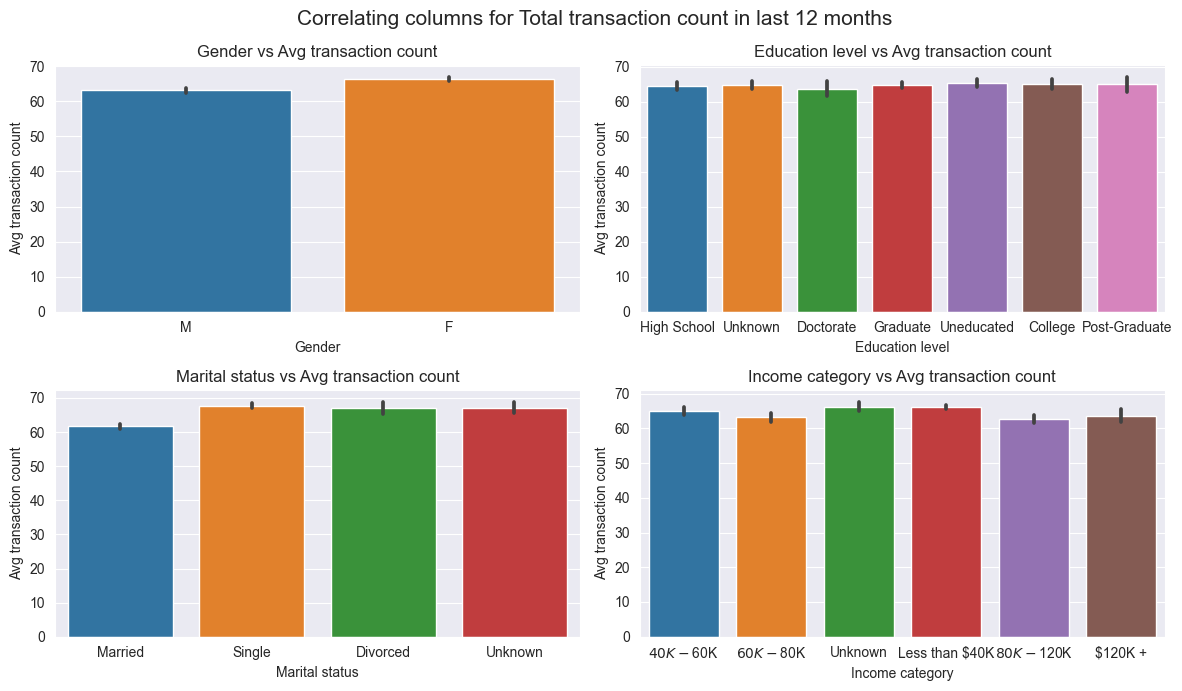

In [32]:
fig, ax = plt.subplots(2,2, figsize=(12,7))

fig.suptitle("Correlating columns for Total transaction count in last 12 months", fontsize=15)

sns.barplot(x=df.gender, y=df.total_trans_ct, ax=ax[0,0])
ax[0,0].set(title="Gender vs Avg transaction count", xlabel="Gender", ylabel="Avg transaction count")

sns.barplot(x=df.education_level, y=df.total_trans_ct, ax=ax[0,1])
ax[0,1].set(title="Education level vs Avg transaction count", xlabel="Education level", ylabel="Avg transaction count")

sns.barplot(x=df.marital_status, y=df.total_trans_ct, ax=ax[1,0])
ax[1,0].set(title="Marital status vs Avg transaction count", xlabel="Marital status", ylabel="Avg transaction count")

sns.barplot(x=df.income_category, y=df.total_trans_ct, ax=ax[1,1])
ax[1,1].set(title="Income category vs Avg transaction count", xlabel="Income category", ylabel="Avg transaction count")

plt.tight_layout()
plt.show()

In [5]:
# creating a new column 'age_grp_div'
# source - https://stackoverflow.com/questions/52753613/grouping-categorizing-ages-column
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['age_grp_div'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)

In [6]:
# creating a new churned column
df['churned'] = df.attrition_flag.map({'Existing Customer':0, 'Attrited Customer':1})
df.head()

clientnum     attrition_flag  ...  age_grp_div churned
0  806160108  Existing Customer  ...        60-70       0
1  804424383  Existing Customer  ...        60-70       0
2  708300483  Attrited Customer  ...        60-70       1
3  808284783  Existing Customer  ...        60-70       0
4  712720158  Existing Customer  ...        60-70       0

[5 rows x 23 columns]

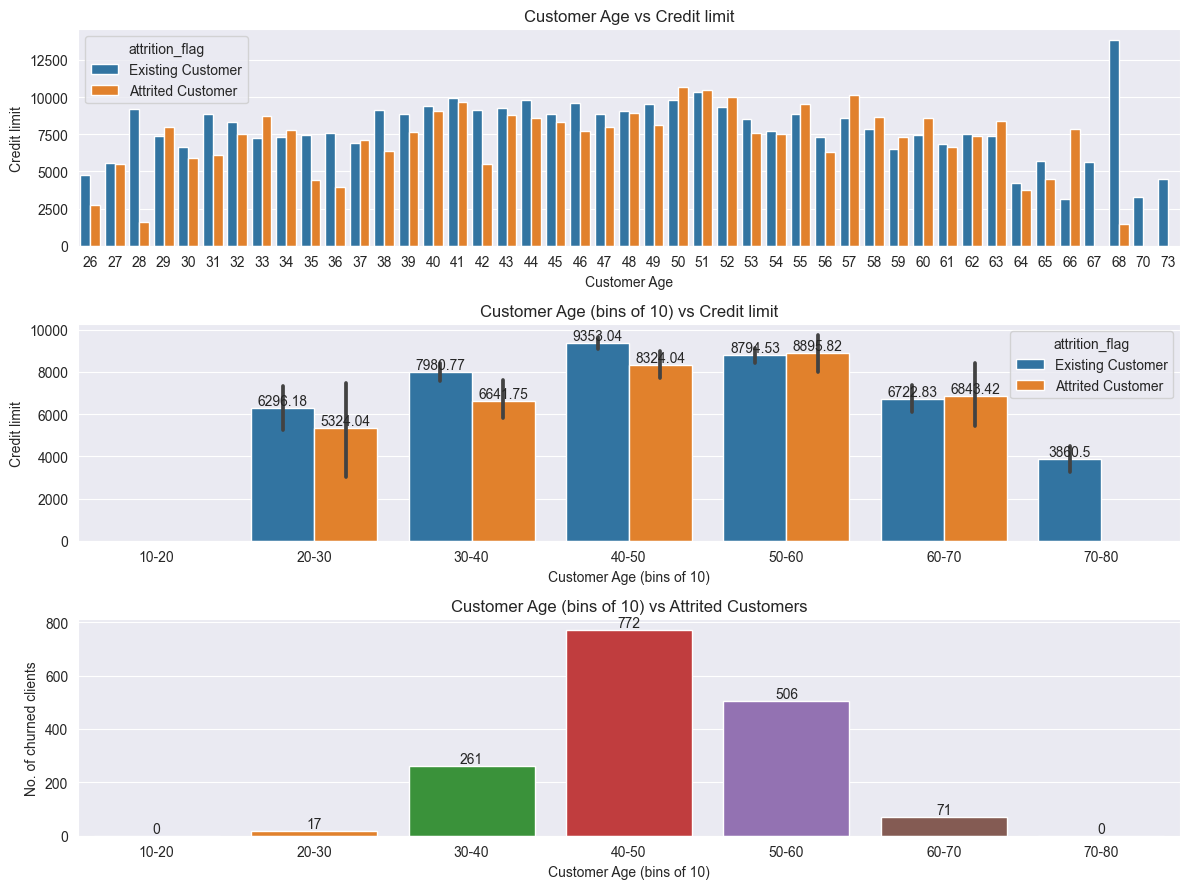

In [67]:
fig, ax = plt.subplots(3,1, figsize=(12,9))

g1 = sns.barplot(x=df.customer_age, y=df.credit_limit, hue=df.attrition_flag, ci=False, ax=ax[0])
g1.set(title="Customer Age vs Credit limit", xlabel="Customer Age", ylabel="Credit limit")

g2 = sns.barplot(x=df.age_grp_div, y=df.credit_limit, hue=df.attrition_flag, ax=ax[1])
g2.set(title="Customer Age (bins of 10) vs Credit limit", xlabel="Customer Age (bins of 10)", ylabel="Credit limit")
for i in g2.containers:
    g2.bar_label(i,)

age_grp_div_sum = df.groupby("age_grp_div").sum().reset_index()
g3 = sns.barplot(x=age_grp_div_sum.age_grp_div, y=age_grp_div_sum.churned, ax=ax[2])
g3.set(title="Customer Age (bins of 10) vs Attrited Customers", xlabel="Customer Age (bins of 10)", ylabel="No. of churned clients")
g3.bar_label(g3.containers[0])    
# source- https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/    
plt.tight_layout()
plt.show()

In [88]:
# calculating percent of each age group
df.groupby("age_grp_div").sum().reset_index().churned * 100/ df.groupby("age_grp_div").count().reset_index().churned

0          NaN
1     8.717949
2    14.177078
3    16.926113
4    16.877919
5    13.396226
6     0.000000
Name: churned, dtype: float64

Findings -
- It is seen that, clients aged less than 30 and more than 60 are not churning out as much as clients aged 30 to 60.

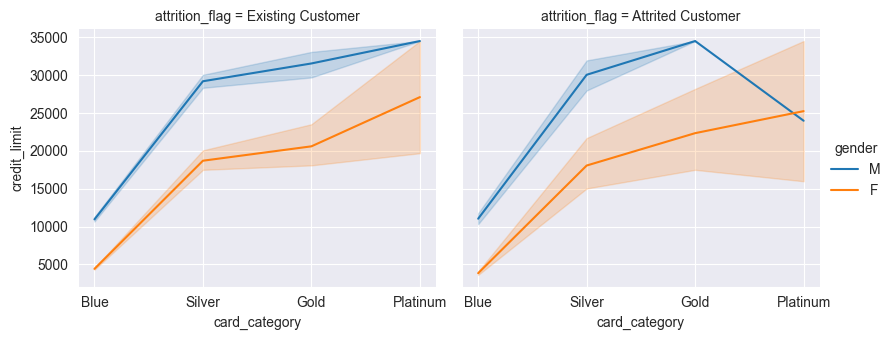

In [28]:
g = sns.FacetGrid(df, col='attrition_flag', hue='gender', sharex=False, height=3.5, aspect=1.2)

g.map_dataframe(sns.lineplot, x='card_category', y='credit_limit')
g.add_legend();

In [35]:
df.groupby('attrition_flag').mean().reset_index()


attrition_flag     clientnum  ...  total_trans_ct  churned
0  Attrited Customer  7.352614e+08  ...       44.933620      1.0
1  Existing Customer  7.399272e+08  ...       68.672588      0.0

[2 rows x 17 columns]

In [64]:
df.groupby('attrition_flag').mean().reset_index()['avg_utilization_ratio']

0    0.162475
1    0.296412
Name: avg_utilization_ratio, dtype: float64

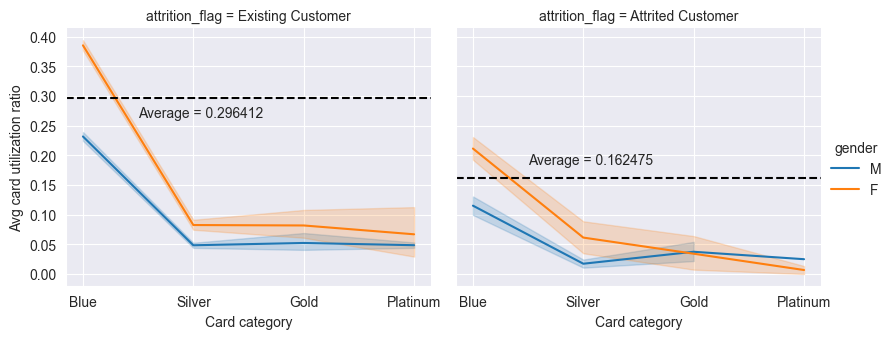

In [16]:
g = sns.FacetGrid(df, col='attrition_flag', hue='gender', sharex=False, height=3.5, aspect=1.2)

g.map_dataframe(sns.lineplot, x='card_category', y='avg_utilization_ratio')

# source- https://stackoverflow.com/questions/51891370/draw-a-line-at-specific-position-annotate-a-facetgrid-in-seaborn
# getting the current axes object for the facetgrid plot
ax1, ax2 = g.axes[0]
# adding the horizontal line to the plot
ax1.axhline(y=0.2964117647, color='black', linestyle='--')
ax1.text(0.5,0.265, "Average = 0.296412")
ax1.set_xlabel("Card category")
ax1.set_ylabel("Avg card utilization ratio")
ax2.axhline(y=0.1624751076, color='black', linestyle='--')
ax2.text(0.5,0.185, "Average = 0.162475")
ax2.set_xlabel("Card category")
    
g.add_legend();

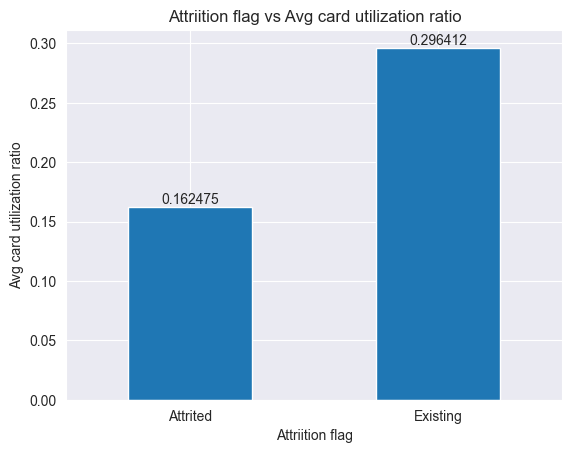

In [74]:
ax = df.groupby('attrition_flag').mean().reset_index()['avg_utilization_ratio'].plot(kind='bar')
ax.set(title="Attriition flag vs Avg card utilization ratio", xlabel="Attriition flag", ylabel="Avg card utilization ratio")
ax.set_xticklabels(['Attrited', 'Existing'], rotation=0)
for i in ax.containers:
    ax.bar_label(i,);

Findings - 
- Attrited customers' avg utilization ratio is almost half that of existing ones.

In [56]:
df.groupby('card_category').sum()['churned']

card_category
Blue        1519
Gold          21
Platinum       5
Silver        82
Name: churned, dtype: int64

In [60]:
df.groupby('card_category').size()

card_category
Blue        9436
Gold         116
Platinum      20
Silver       555
dtype: int64

In [79]:
ccc_perc

card_category
Blue        16.097923
Gold        18.103448
Platinum    25.000000
Silver      14.774775
dtype: float64

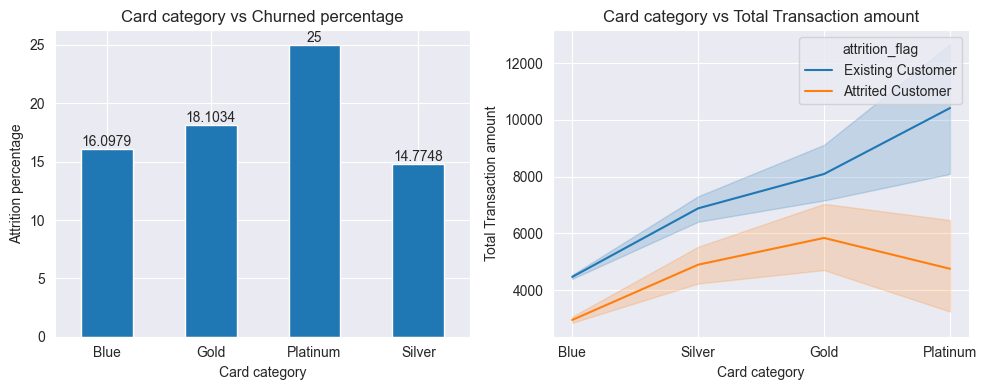

In [20]:
ccc_perc = df.groupby('card_category').sum()['churned'] * 100/ df.groupby('card_category').size()

fig, ax = plt.subplots(1, 2, figsize=(10,4))

g1 = ccc_perc.plot(kind='bar', ax=ax[0])
g1.set(title="Card category vs Churned percentage", xlabel="Card category", ylabel="Attrition percentage")
g1.set_xticklabels(ccc_perc.index, rotation=0)
for i in g1.containers:
    g1.bar_label(i)

g2 = sns.lineplot(data=df, x='card_category', y='total_trans_amt', hue='attrition_flag', ax=ax[1])
g2.set(title="Card category vs Total Transaction amount", xlabel="Card category", ylabel="Total Transaction amount")


plt.tight_layout()
plt.show()

Finding - 
- As per percentage of attrition, more percent of clients are churning in platinum card category, followed by gold, blue and silver.

## 5. Raising Data Questions - 



#### _Questions-_

1) What is the distribution between different types of client (attrition status, dependent count, card category, customer age, gender, education level, marital status, income category)?
2) What is the distribution for numerical columns?
3) Is there any correlation between different columns in the dataset?
4) What is the most significant column which is impacting customer churn in my dataset?

#### _Answers-_
1) Distribution graphs for each categorical data is plotted above.
	#### Summary-
    - It is seen that 1627 customers have attrited
    - Majority of clients have more than 1 dependents. 2 and 3 being the most common number of dependents for clients.
    - Maximum number of people use Blue category card than other 3 types
    - Median customer age is 46
    - Overall, there are more female clients than male clients
    - Most common education of clients is 'Graduate', followed by 'High School', etc
    - Most clients are married, followed by single
    - Most clients have income less than 40K followed by 40K-60K
2) Distribution graphs for each numerical data is plotted above.
	#### Summary-
    - 50% of clients have average open to buy credit line is below 3474
    - 50% of clients have the average card utilization ratio is below 0.176
    - Credit limit of 50% clients is less than 4549
	- Most number of clients are inactive for 1 to 3 months in the last 12 months and some are for 4 to 6 months.
	- The number of contacts a client makes is in a similar pattern to the number of dependents graph.
	- Most of the customers hold 3 or more products
	- Median period of relationship of clients with the bank is 36 months
	- For change in transaction amount, all values are positive, which means that the transaction amount has increased in Q4 over Q1, majority of values fall below the average
	- Majority of values of total transaction amount fall below the average (4404.08)
	- For change in transaction count, median and mean are almost same
	- Majority of values for total transaction count fall after the average value
3) Cross-correlation analysis plots are plotted above.
	#### Summary-
    - There is not a major difference between the credit limit of existing and attrited customers.
    - Credit limit of platinum card clients is the highest, followed by gold, silver and blue, respectively.
    - It seems that credit limit for clients with 1 or more dependents is greater than those with 0 dependents.
    - Attritted customers are inactive for more months on average compared to existing ones
    - Attritted customers have made more number of contacts in the last 12 months.
    - Existing customers have better average card utilization ratio as compared to attrited ones. Attrited customers' avg utilization ratio is almost half that of existing ones
    - Blue card category customers have better average card utilization ratio than other 3 cards.
    - Males have more than double credit limit on average as compared to female clients.
    - Credit limit of married clients is less than other categories
    - Credit limit is directly promotional to the amount of income hence it increases as the income category increase
    - On average, males have higher open to buy credit line in the last 12 months than females.
    - On average females have higher card utilization ratio
    - Avg card utilization ratio for high income clients (60K-80K, 80K-120K, & 120K+) is low as compared to low income categories (less than 40K, 40K-60K)
    - On average attrited customers hold lesser number of products than existing customers
    - Average no. of products held is the highest for customers with blue card followed by silver, gold and platinum respectively
    - Avg total revolving balance of existing customers is almost double that of attrited customers
    - Avg total transaction amount of attrited customers is less than existing ones
    - Platinum card users have more total transaction amount on average, followed by gold, silver and blue respectively
    - Avg total transaction amount seems to be more for clients with more than 0 dependents
    - Avg total transaction count of existing customers is higher than attrited ones.
    - Platinum card users are doing more number of transactions on average followed by gold, silver and blue respectively.
    - Avg total transaction count seems to be more for clients with more than 0 dependents
    - Clients aged less than 30 and more than 60 are not churning out as much as clients aged 30 to 60
    - Attrited customers' avg utilization ratio (0.16) is almost half that of existing ones (0.29)
    - As per percentage of attrition, more percent of clients are churning in platinum card category, followed by gold, blue and silver.
4) The most significant column which is impacting customer churn in the dataset is -
	- _'avg_utilization_ratio'_
	- _'total_transaction_ct'_

## 6. Data Enrichment -

- I would want to find out the timeline of each customers who has churned out, to better undertand the time they left and what factor was significant in the time that they churned out.
- I would find the dataset containing columns such as 'date_of_joining' (so as to know how old is the account), 'clientnum', 'transaction_timestamp' (date and time of each transaction), account_usage (time spent on website account), satisfaction_rate (score giving by customer for services), location (location of customer), churn_reason
- I would merge this dataset keeping it on left and assigning 'left' value to the how parameter.
- Then I would ask the below questions:-
	1) How old are the clients who has churned?
	2) How frequent were the transactions made in a month?
	3) How much time did attrited customers spend on the website account vs existing ones?
	4) How was the satisfaction rate between attrited and existing clients?
	5) Was there any location issue faced by clients? 
	6) Did clients give any reason for discontinuation?